## Import Modules

In [1]:
%matplotlib inline
import os
import numpy as np
import h5py
import matplotlib.pyplot as plt
import matplotlib as mpl
from pylab import *

# Import personal modules
import FIREbox_catalog_tools as cat
import general_analysis_tools as gen

plt.rc('font',**{'family':'sans-serif','sans-serif':['Times']})
plt.rc('text', usetex=True)

size = 25

## Data paths for snapshots of interest

In [2]:
snap_z0 = 1200
snap_ztarget = 760

# Path to the FIREbox catalog data
catalog_path_z0 = '../data/catalogs/snap_'+str(snap_z0)+'/'
catalog_path_ztarget = '../data/catalogs/snap_'+str(snap_ztarget)+'/'

# Name of the file
fcen_z0 = 'centrals_'+str(snap_z0)+'.hdf5'
fsat_z0 = 'satellites_'+str(snap_z0)+'.hdf5'

fcen_ztarget = 'centrals_'+str(snap_ztarget)+'.hdf5'
fsat_ztarget = 'satellites_'+str(snap_ztarget)+'.hdf5'

with h5py.File(catalog_path_z0+fcen_z0,'r') as h5:
    keys = list(h5.keys())
    for i in keys:
        print(i)


Dc
Mbaryon
Mdm
Mgas
Mstar
Mvir
Rvir
VXc
VYc
VZc
Xc
Yc
Zc
fbaryon
fdm
fgas
fstar
galaxyID
groupID
hostMbaryon
hostMdm
hostMgas
hostMstar
hostMvir
hostRvir
hostfbaryon
hostfdm
hostfgas
hostfstar
n_baryon
n_dm
n_gas
n_particles
n_star
n_substructures


In [3]:
h = 0.6774
#...Path to snapshot times file
times_path = '../data/FIREbox_snapshot_az.txt'
times = np.loadtxt(times_path)
ztarget = times[:,1][np.where(times[:,0]==snap_ztarget)][0]
atarget = times[:,2][np.where(times[:,0]==snap_ztarget)][0]
print(ztarget)

0.5059952919575184


## Load z=0 catalogs
Only need centrals here to determine which ones we want to focus on

In [4]:
with h5py.File(catalog_path_z0+fcen_z0,'r') as h5:
    gID_cen = h5['groupID'][:]
    galID_cen = h5['galaxyID'][:]
    nsats = h5['n_substructures'][:]
    Mvir_cen = h5['Mvir'][:]/h
    Rvir_cen = h5['Rvir'][:]/h
    c_cen = np.asarray([h5['Xc'][:],h5['Yc'][:],h5['Zc'][:]])
c_cen = np.transpose(c_cen)*(1./h)

## Get properties for desired hosts at z=0
No need to run this cell. This finds the host ids for milky way-like hosts. However, I list the host ids of interest in the following cell. We can think of expanding using this later.

In [5]:

mask = (7e11 <= Mvir_cen) & (Mvir_cen <= 3.2e12) & (nsats >= 1)
host_galID_of_interest = galID_cen[mask]
print('There are '+str(len(host_galID_of_interest))+' centrals at MW mass at z=0:')
print(host_galID_of_interest)


There are 28 centrals at MW mass at z=0:
[11 12 13 14 15 16 17 19 20 21 22 24 25 27 28 29 30 32 33 34 35 36 37 38
 39 40 42 45]


## Connect z=0 host IDs to z=0.5 IDs using main branches

In [6]:
def find_crossing_indices(arr, num):
    indices = []
    for i in range(len(arr) - 1):
        if (arr[i] < num and arr[i + 1] > num):
            indices.append(i)
            indices.append(i+1)
    return indices

In [7]:
 #...Use this line if you know what halos you want to select rather than using selection criteria (cell 5)
 # #host_galID_of_interest = np.asarray([24,25,28])
host_galID_z0 = np.asarray([])
host_galID_ztarget = np.asarray([])
tree_path = '../data/main_branches/snap_'+str(snap_z0)+'/'
for halo in host_galID_of_interest:
    fname = 'halo_'+str(halo).zfill(7)+'.dat'
    tree = np.loadtxt(tree_path+fname)
    tree_z = tree[:,0]
    tree_ID = tree[:,1]
    inds = find_crossing_indices(tree_z,ztarget)
    if tree_ID[inds[0]]==tree_ID[inds[1]]:
        host_galID_z0 = np.append(host_galID_z0,int(halo))
        host_galID_ztarget = np.append(host_galID_ztarget,int(tree_ID[inds[0]]))
    else:
        print('Halo_'+str(halo)+': Target z host ID can be either '+str(int(tree_ID[inds[0]]))+' or '+str(int(tree_ID[inds[1]]))+'. Appending both halo IDs anyway.')
        host_galID_z0 = np.append(host_galID_z0,int(halo))
        host_galID_z0 = np.append(host_galID_z0,int(halo))
        host_galID_ztarget = np.append(host_galID_ztarget,int(tree_ID[inds[0]]))
        host_galID_ztarget = np.append(host_galID_ztarget,int(tree_ID[inds[1]]))
print('')
print(len(host_galID_ztarget.astype(int)))
print(len(host_galID_z0.astype(int)))    

Halo_11: Target z host ID can be either 12 or 11. Appending both halo IDs anyway.
Halo_12: Target z host ID can be either 13 or 12. Appending both halo IDs anyway.
Halo_14: Target z host ID can be either 27 or 26. Appending both halo IDs anyway.
Halo_19: Target z host ID can be either 23 or 22. Appending both halo IDs anyway.
Halo_21: Target z host ID can be either 30 or 35. Appending both halo IDs anyway.
Halo_22: Target z host ID can be either 32 or 31. Appending both halo IDs anyway.
Halo_24: Target z host ID can be either 33 or 32. Appending both halo IDs anyway.
Halo_29: Target z host ID can be either 34 or 33. Appending both halo IDs anyway.
Halo_32: Target z host ID can be either 35 or 34. Appending both halo IDs anyway.
Halo_33: Target z host ID can be either 46 or 45. Appending both halo IDs anyway.
Halo_34: Target z host ID can be either 45 or 46. Appending both halo IDs anyway.
Halo_36: Target z host ID can be either 40 or 41. Appending both halo IDs anyway.
Halo_37: Target 

## Load target redshift catalogs

In [8]:
with h5py.File(catalog_path_ztarget+fcen_ztarget,'r') as h5:
    gID_cen = h5['groupID'][:]
    galID_cen = h5['galaxyID'][:]
    nsats = h5['n_substructures'][:]
    Mvir_cen = h5['Mvir'][:]/h
    Rvir_cen = h5['Rvir'][:]/h
    c_cen = np.asarray([h5['Xc'][:],h5['Yc'][:],h5['Zc'][:]])
c_cen = np.transpose(c_cen)*(atarget/h)

with h5py.File(catalog_path_ztarget+fsat_ztarget,'r') as h5:
    gID_sat = h5['groupID'][:]
    galID_sat = h5['galaxyID'][:]
    nsats = h5['n_substructures'][:]
    Mvir_sat = h5['Mvir'][:]/h
    Rvir_sat = h5['Rvir'][:]/h
    c_sat = np.asarray([h5['Xc'][:],h5['Yc'][:],h5['Zc'][:]])
c_sat = np.transpose(c_sat)*(atarget/h)


## Plot hosts and their satellites at the target redshift

------- at z=0.5 -------
-- host 12 --
SatIDs: [ 143  198 1539 1544 3260 5617]
--------------

-- host 11 --
SatIDs: [ 600 1545 2816 3005 4659 8394]
--------------

-- host 13 --
SatIDs: [  230   581   796  1619 14026]
--------------

-- host 12 --
SatIDs: [ 143  198 1539 1544 3260 5617]
--------------

-- host 17 --
SatIDs: [  571  3152 10578]
--------------

-- host 27 --
SatIDs: [ 123  164  408 1298 1776]
--------------

-- host 26 --
SatIDs: [201]
--------------

-- host 19 --
SatIDs: [  770  1412  1742  1781  5739 15701]
--------------

-- host 18 --
SatIDs: [ 346  514  864  894 1061 1472 5126]
--------------

-- host 21 --
SatIDs: [ 681  710 1322 1740 2509 6603 9300]
--------------

-- host 23 --
SatIDs: []
This satellite will be removed from the list
--------------

-- host 22 --
SatIDs: [ 391 1347 1872 1966 3245 5640 5920 6572 7238]
--------------

-- host 24 --
SatIDs: [ 520  584  726 4698]
--------------

-- host 30 --
SatIDs: []
This satellite will be removed from the list
-

/var/folders/1s/q5pj4cgj1tn1rjk58nqzdd2h0000gn/T/ipykernel_95787/1372238151.py:38: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(figsize=(7,6),constrained_layout=True,dpi=100)


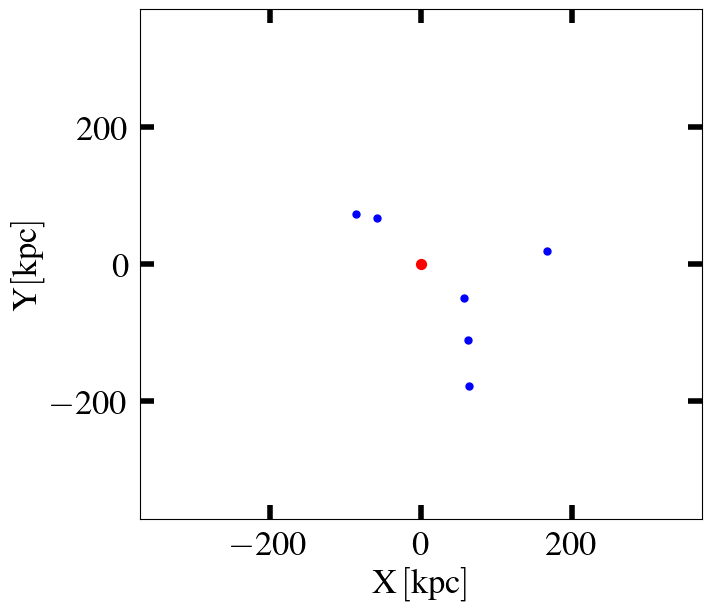

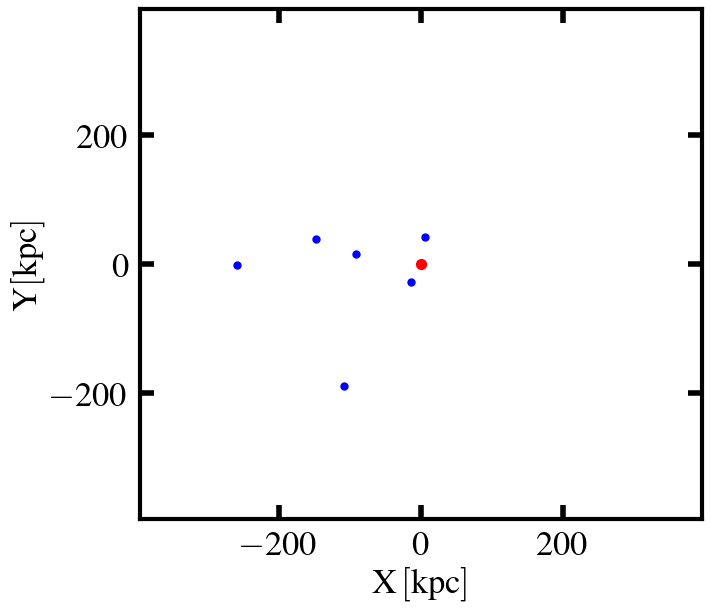

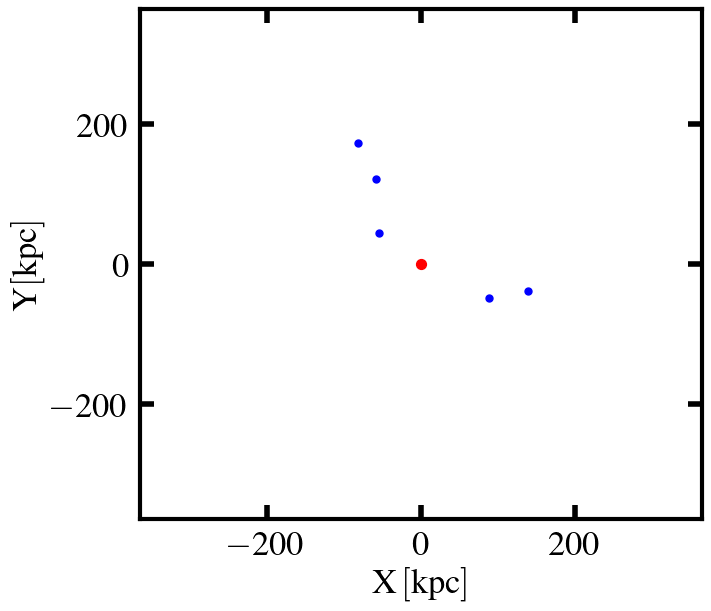

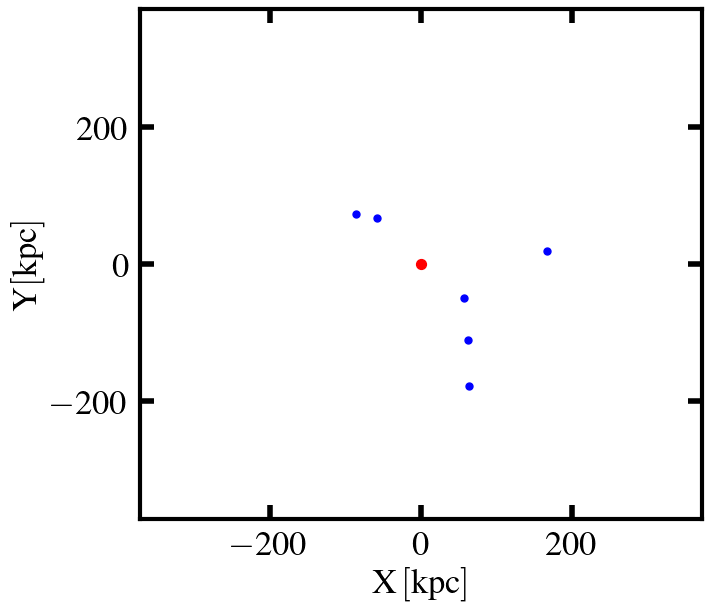

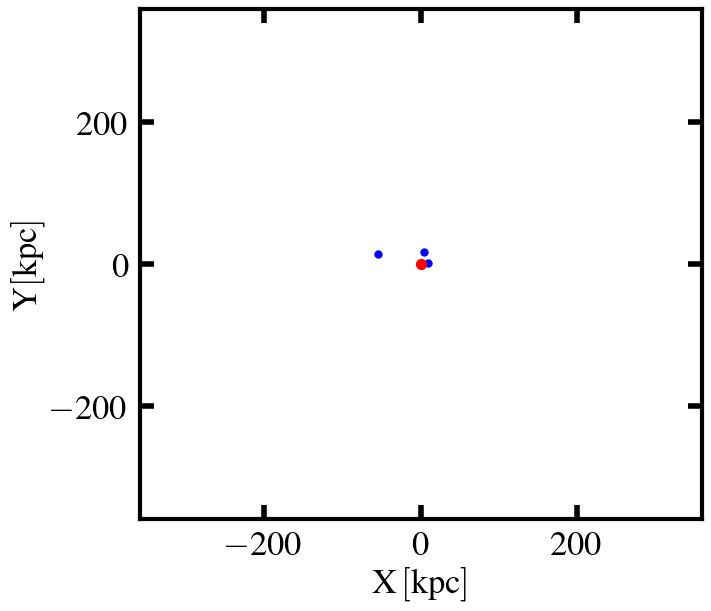

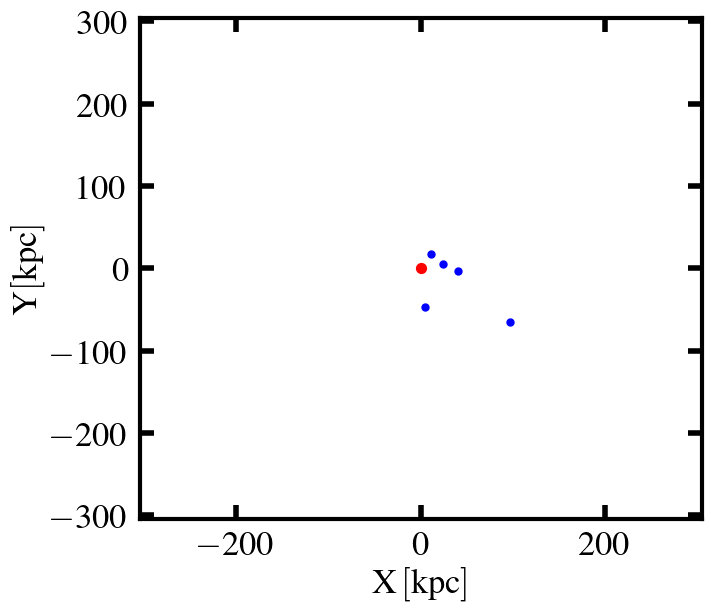

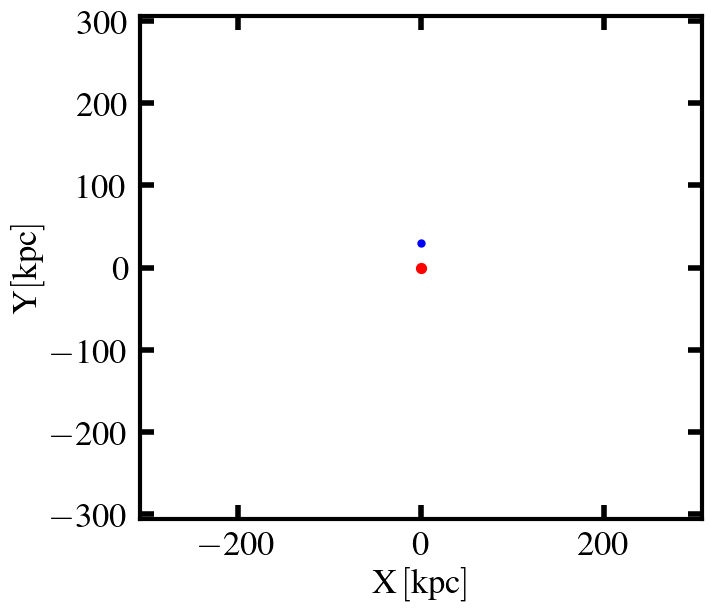

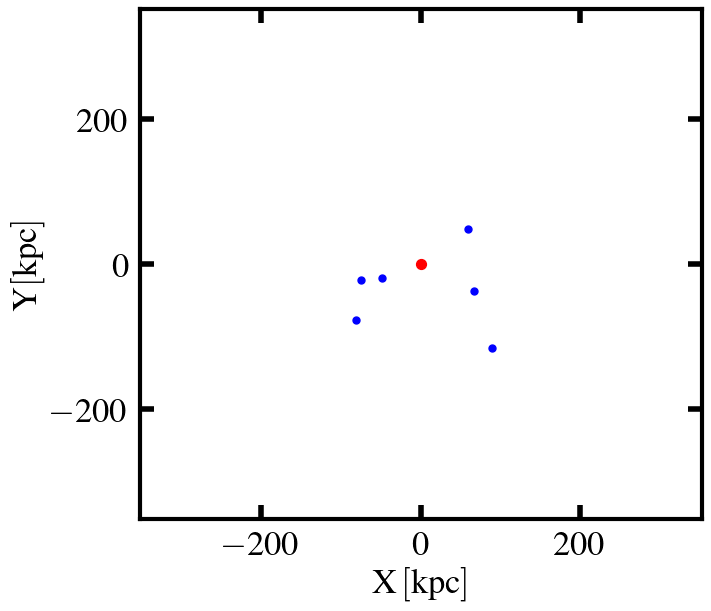

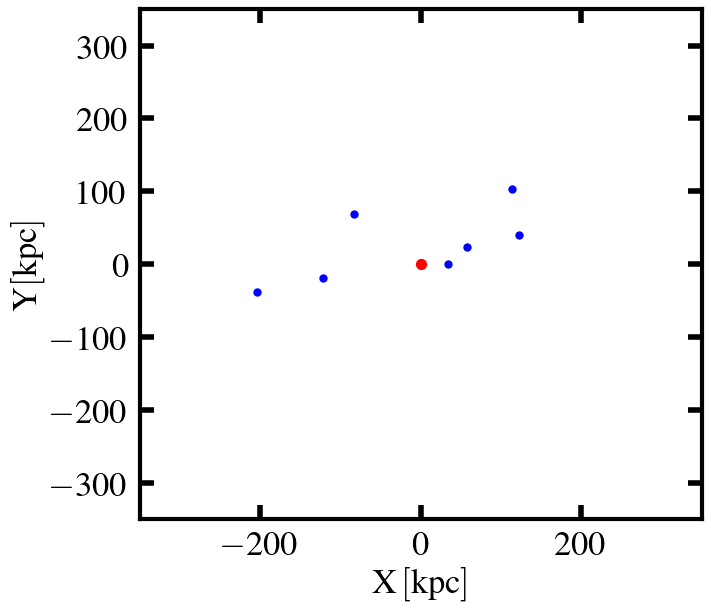

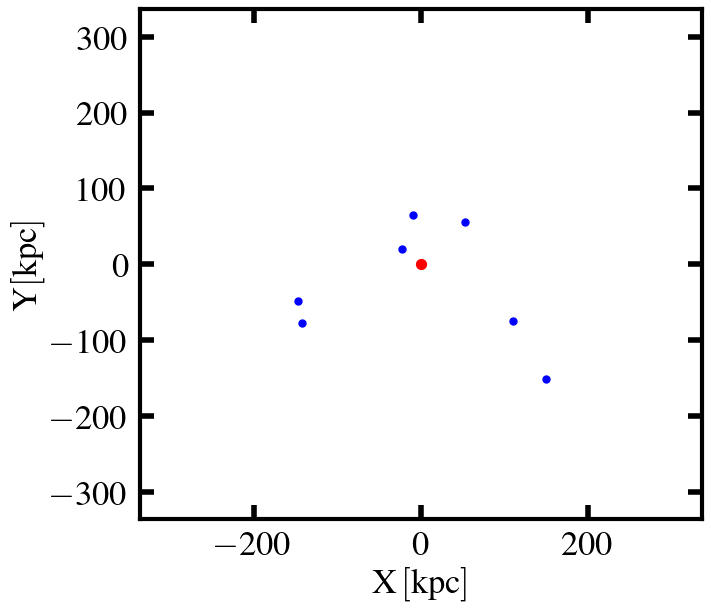

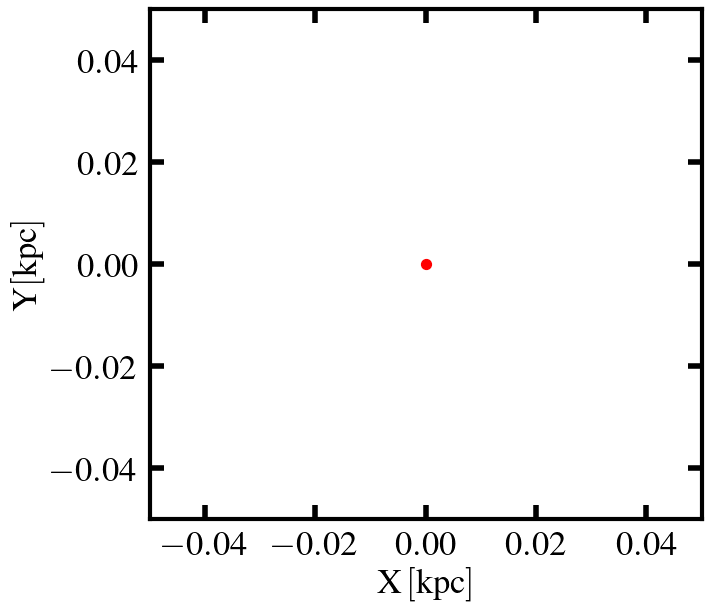

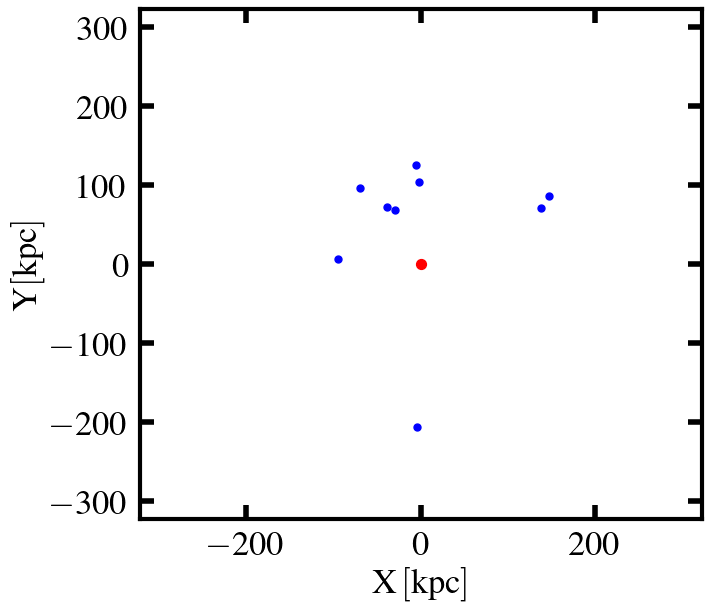

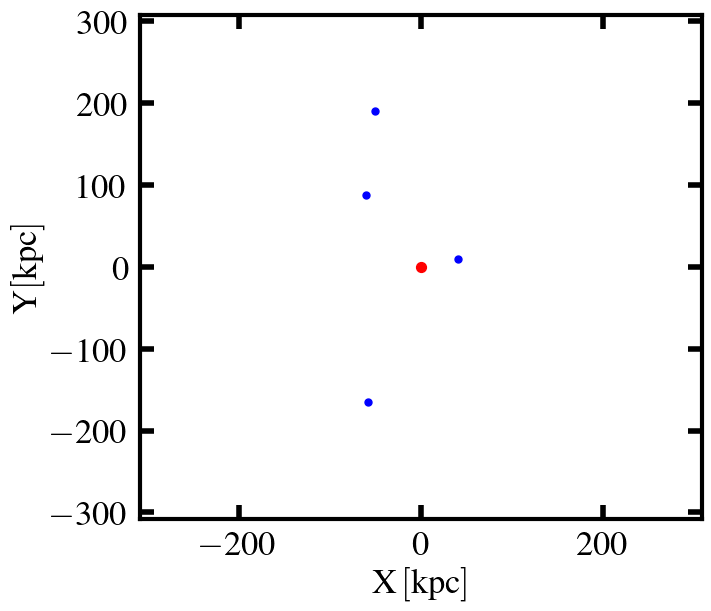

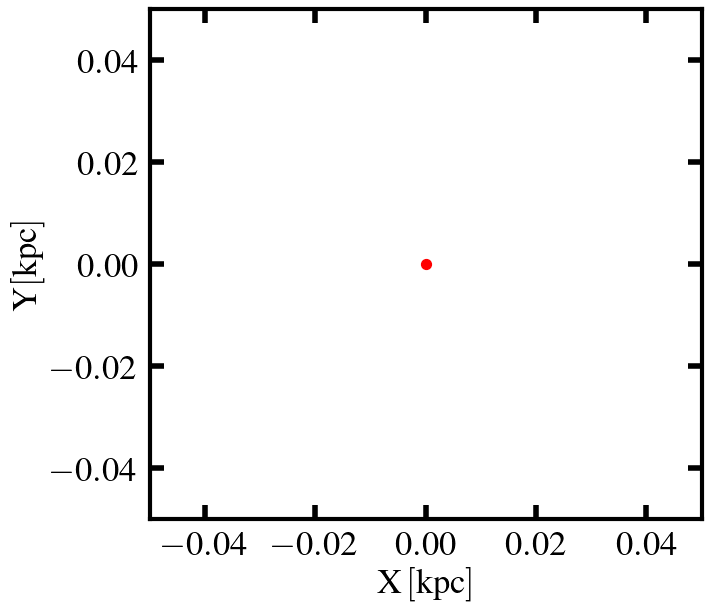

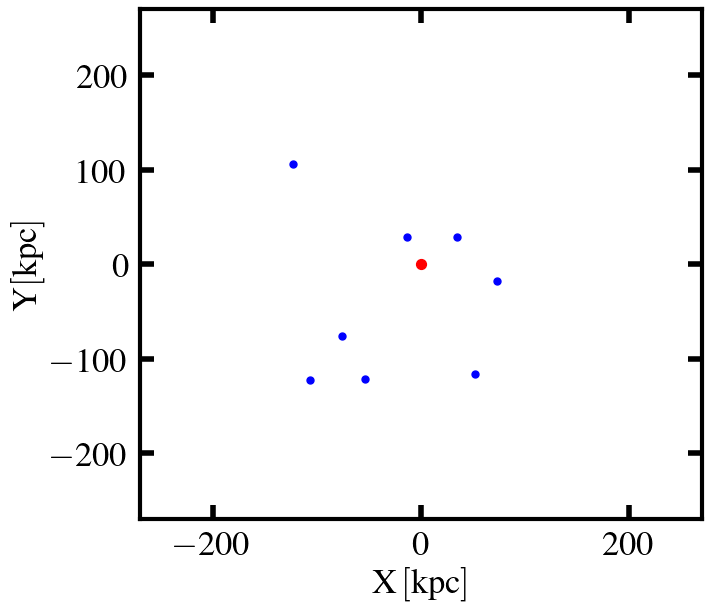

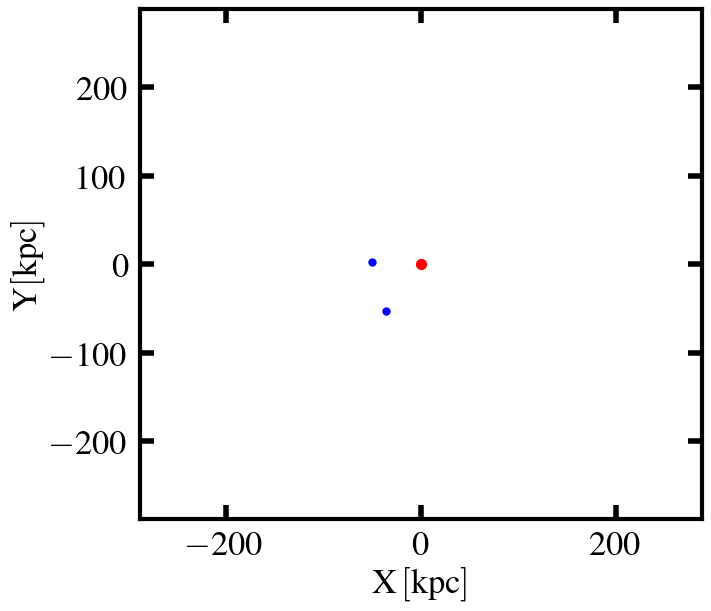

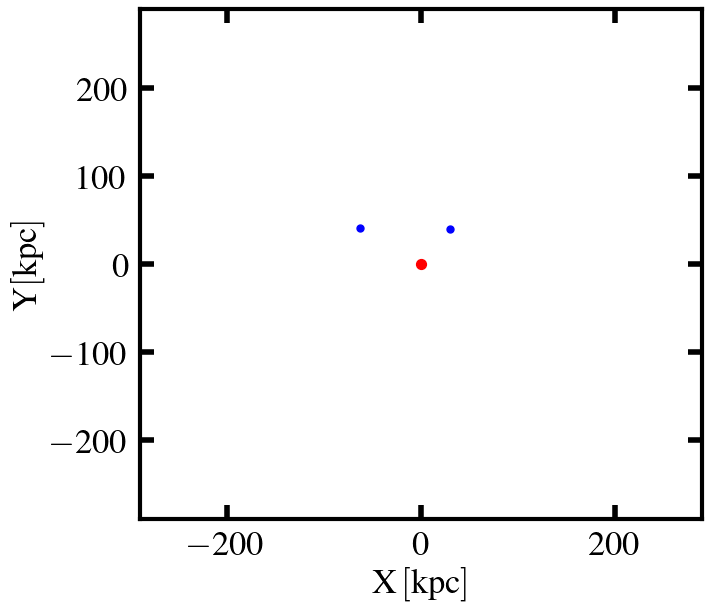

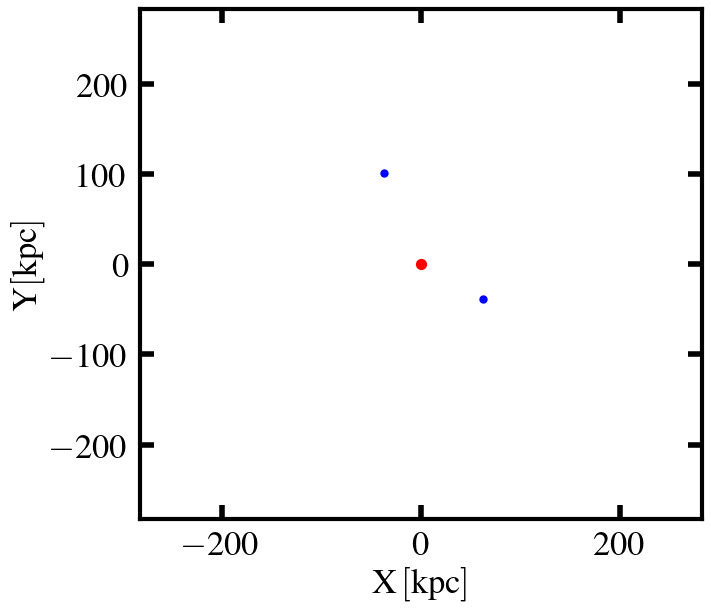

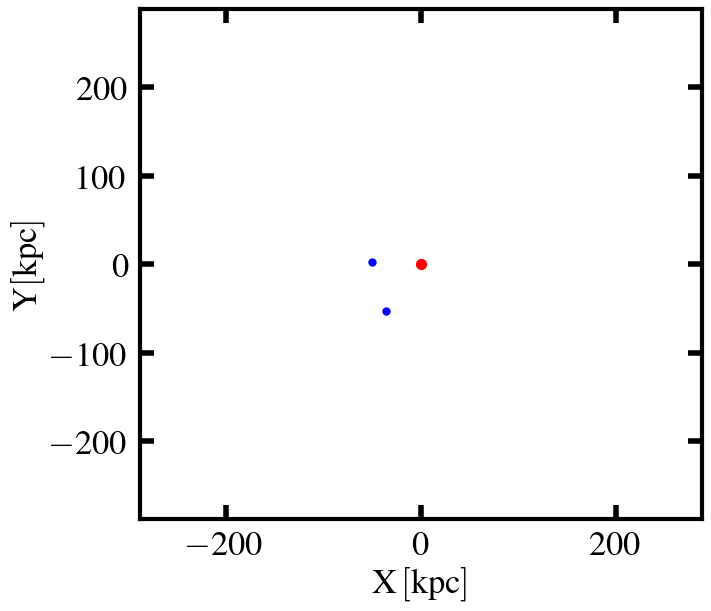

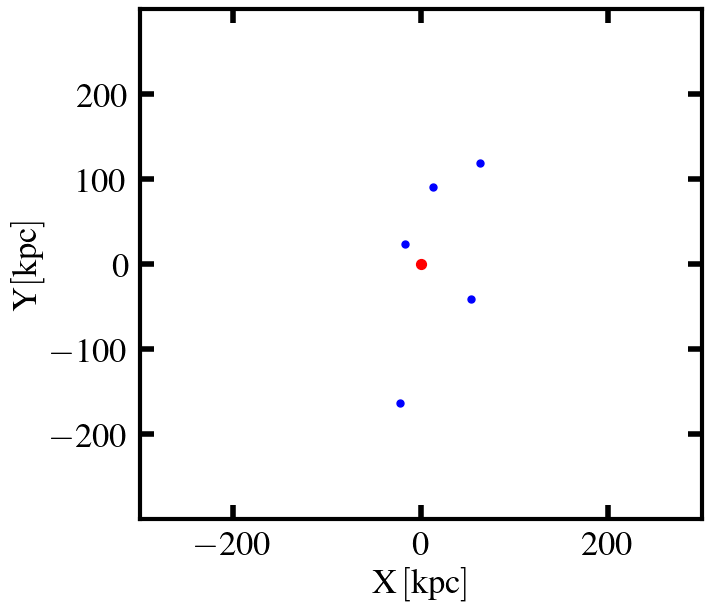

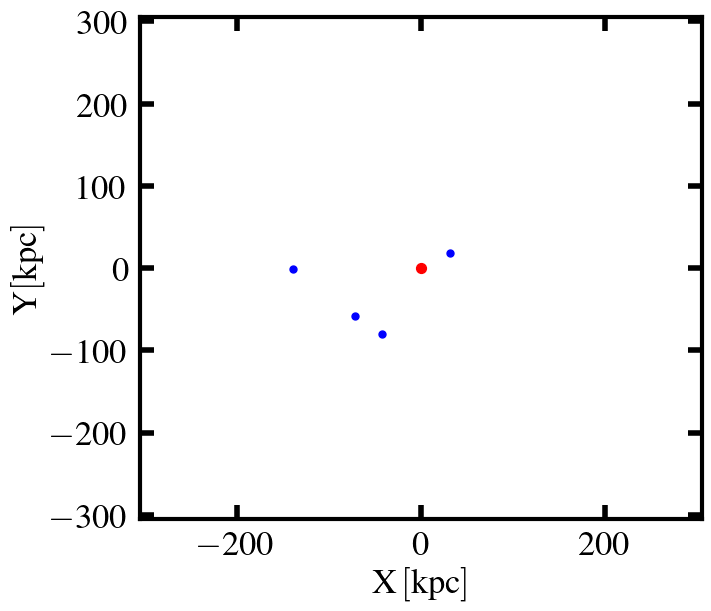

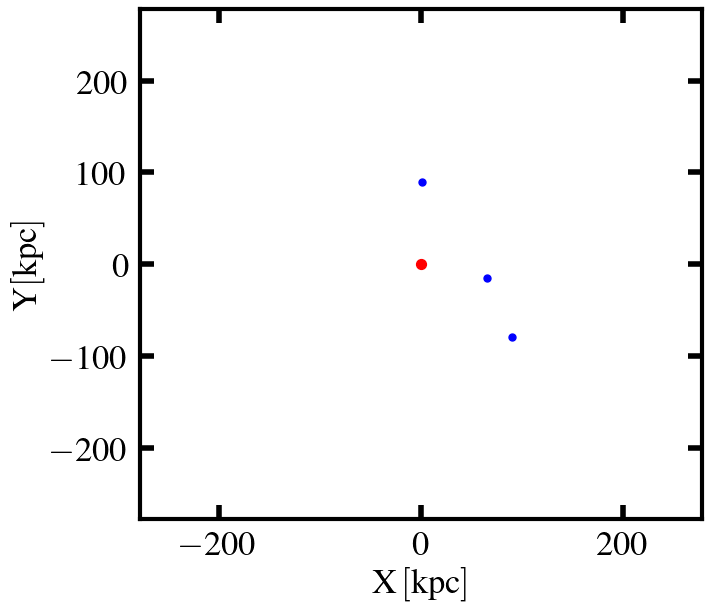

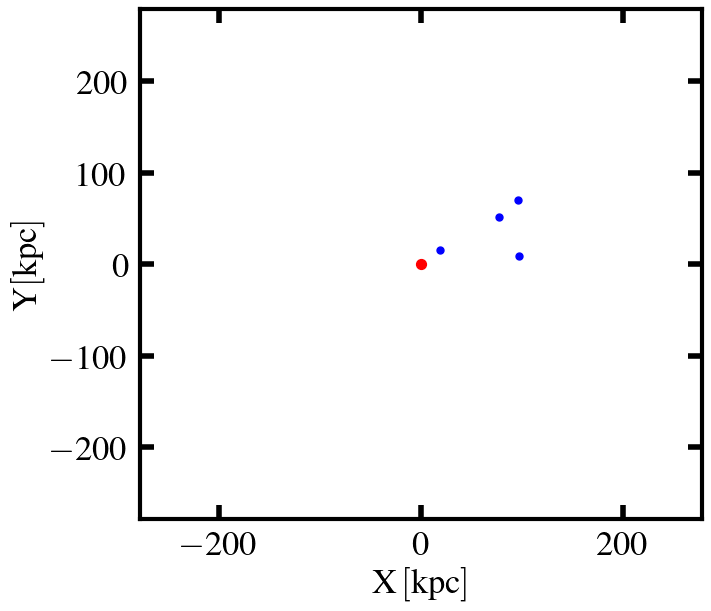

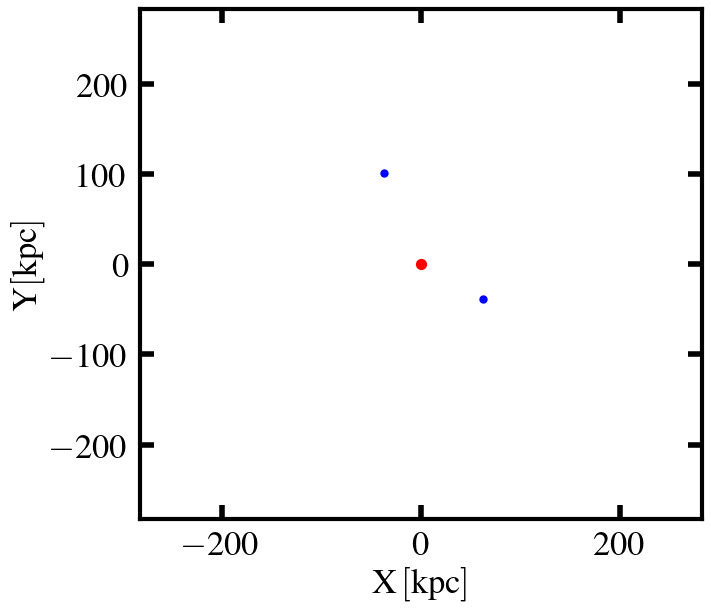

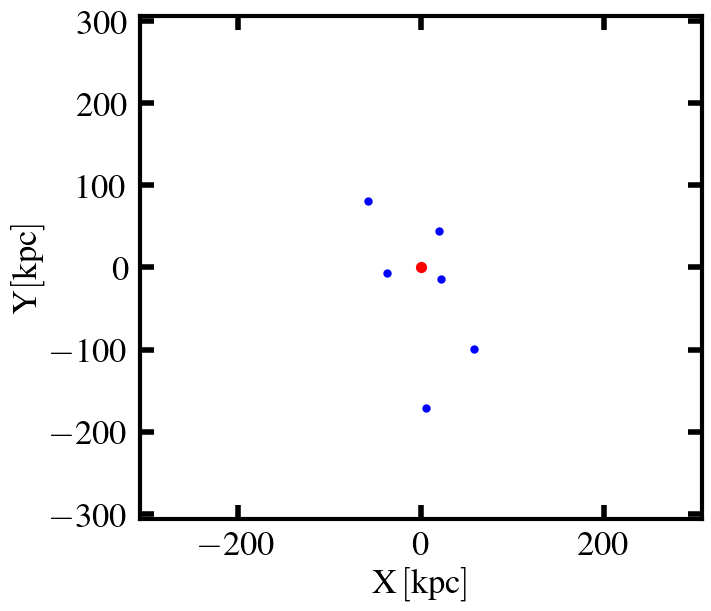

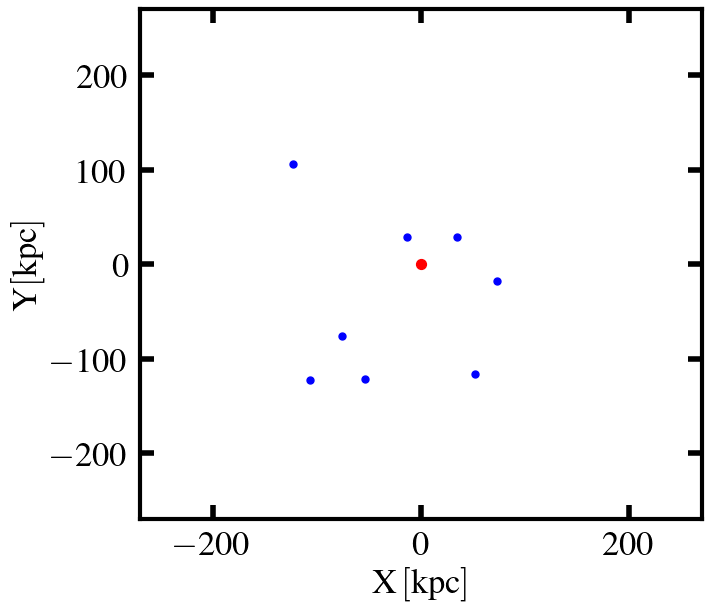

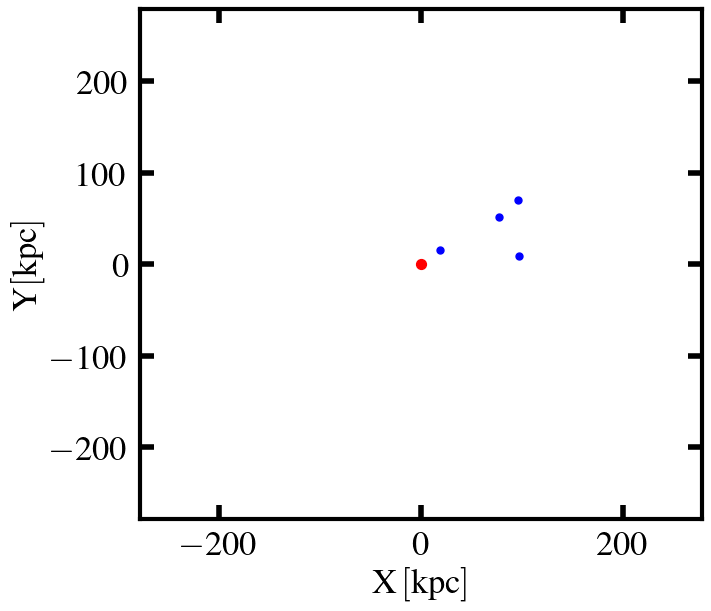

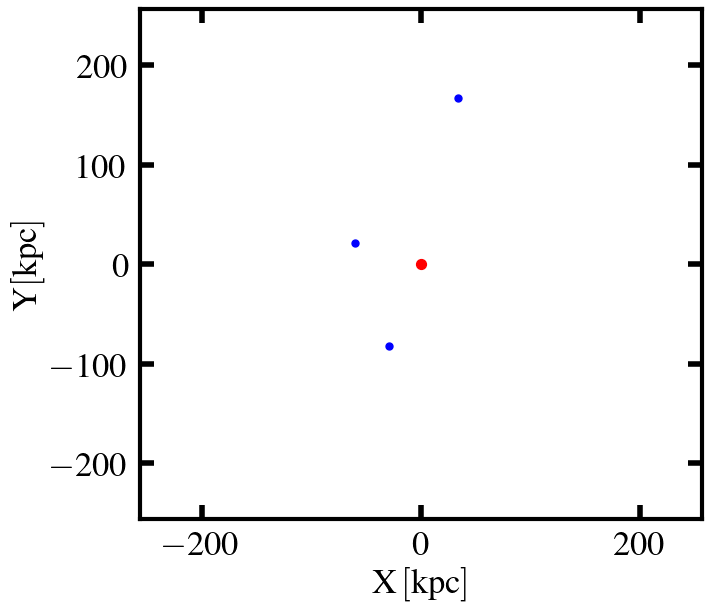

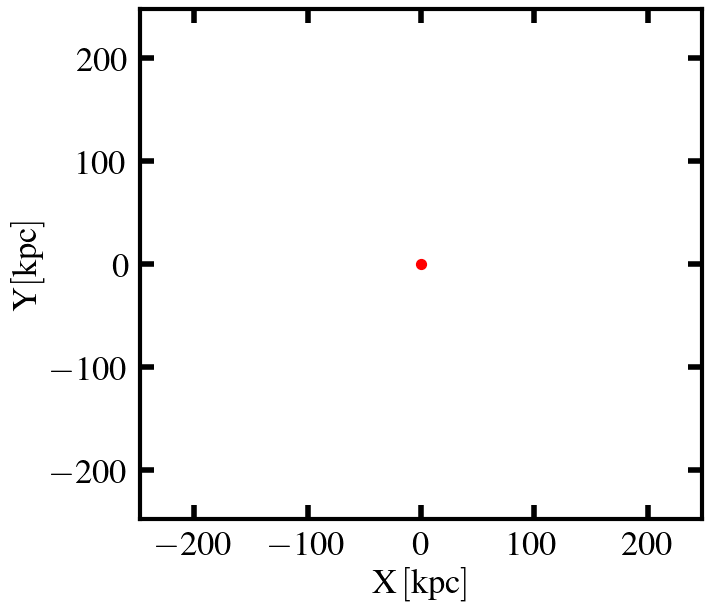

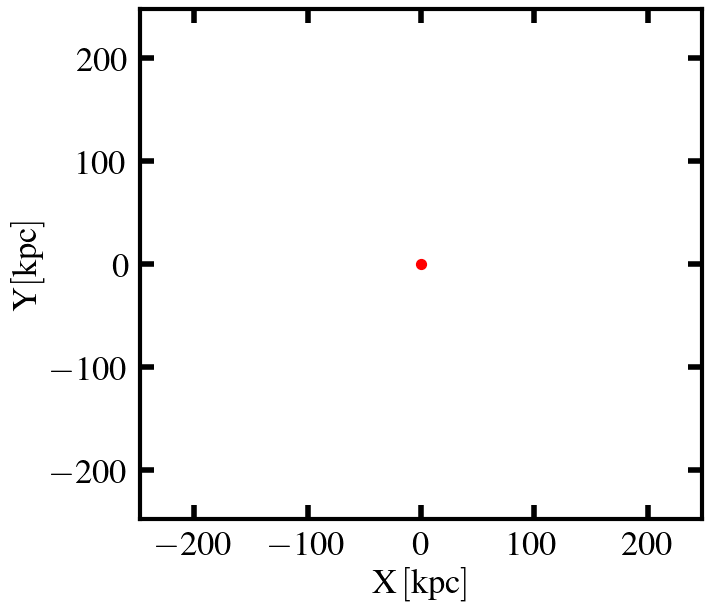

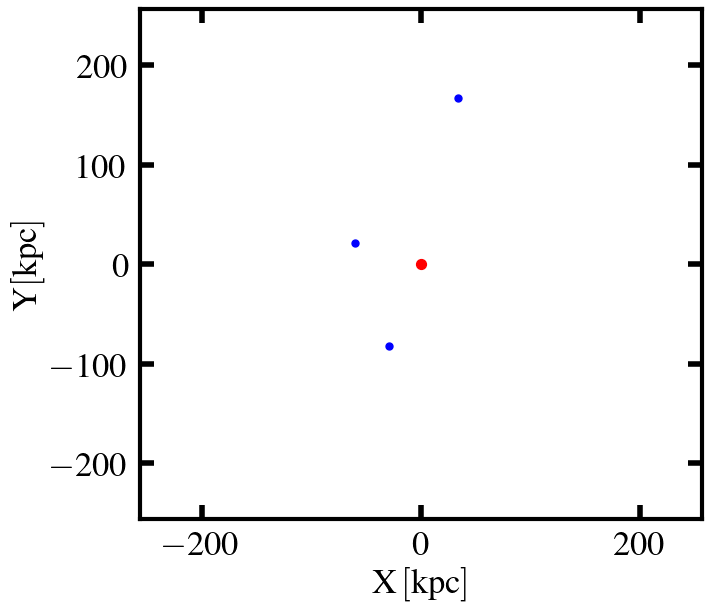

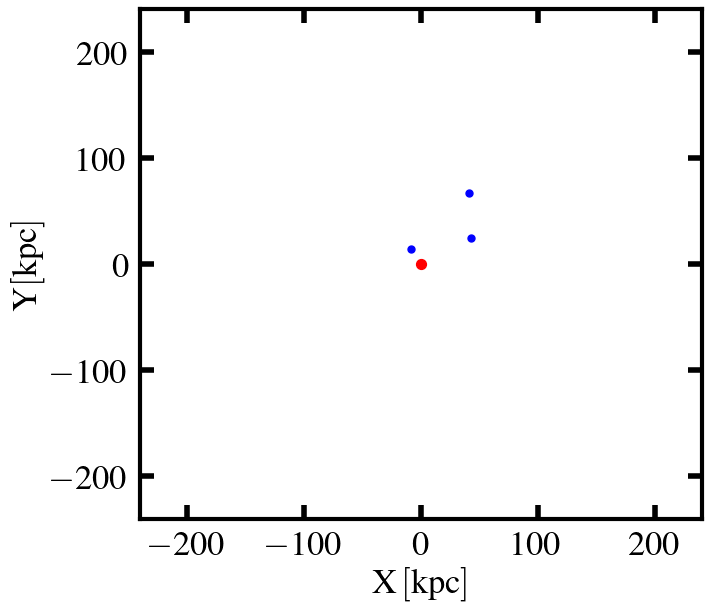

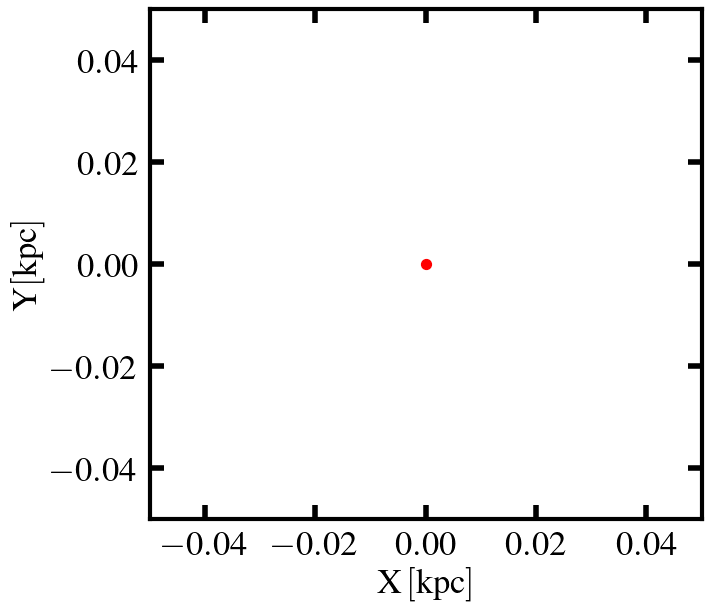

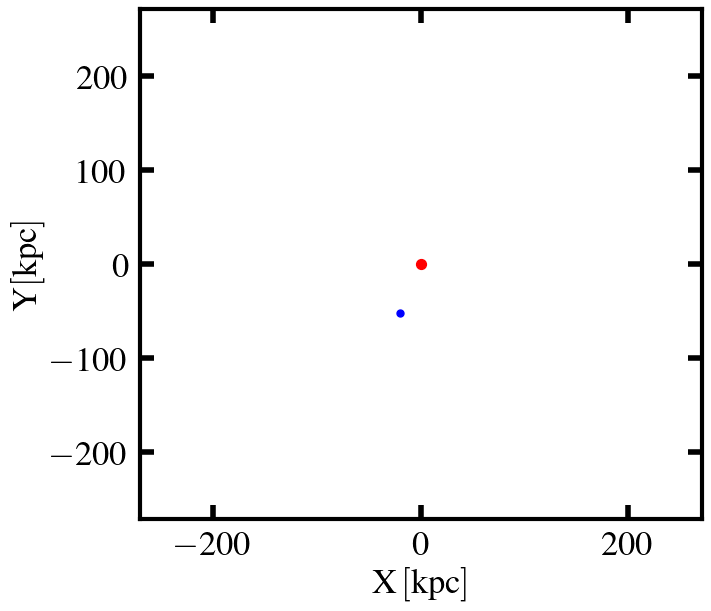

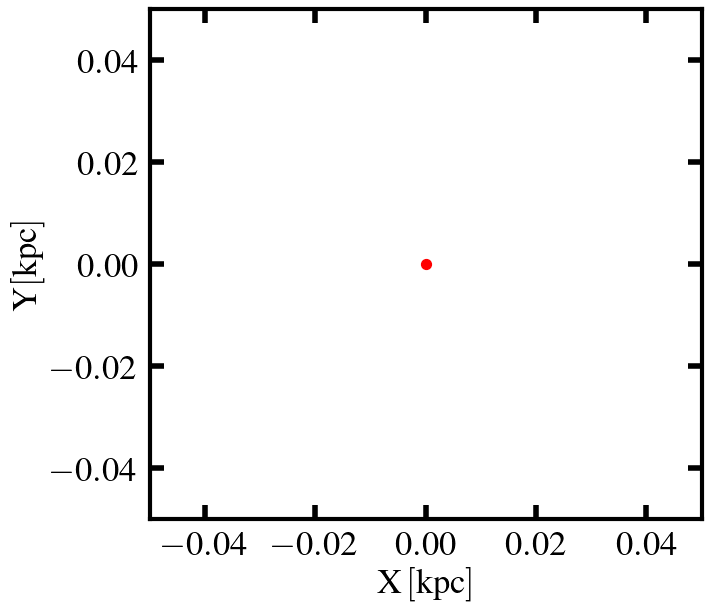

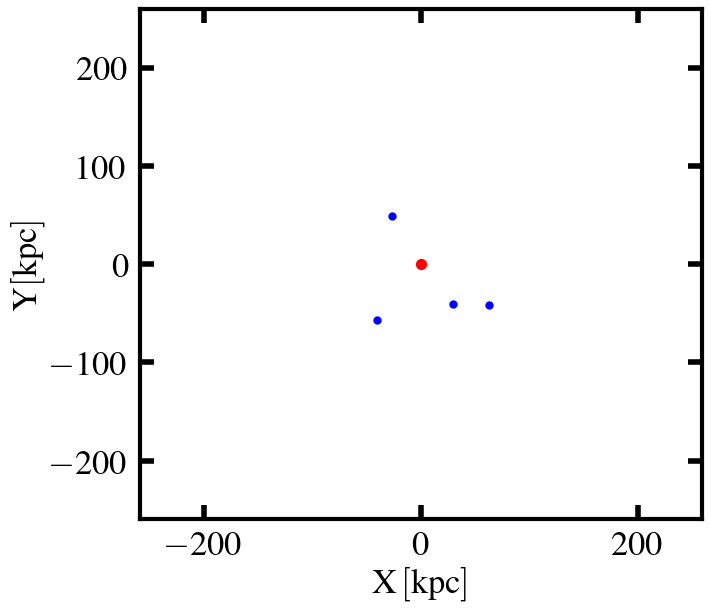

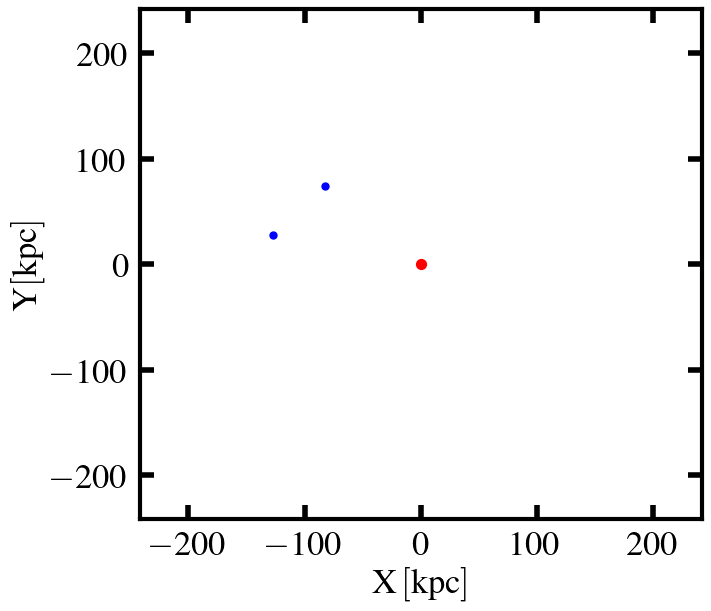

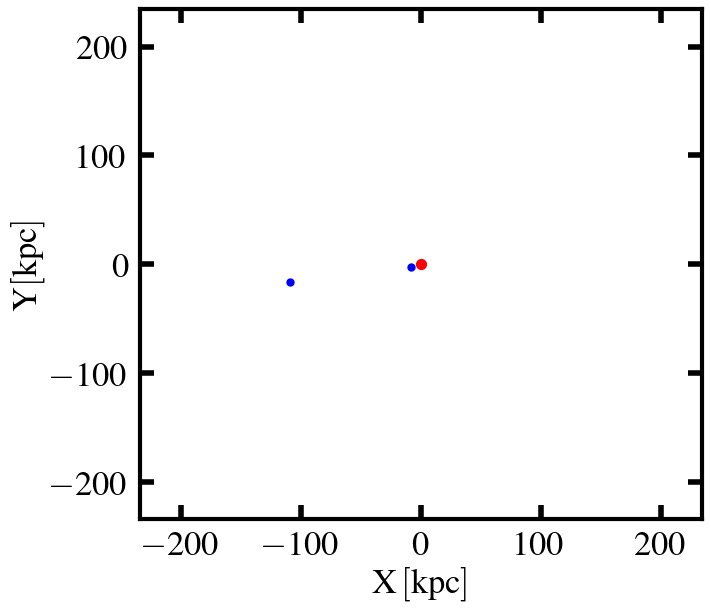

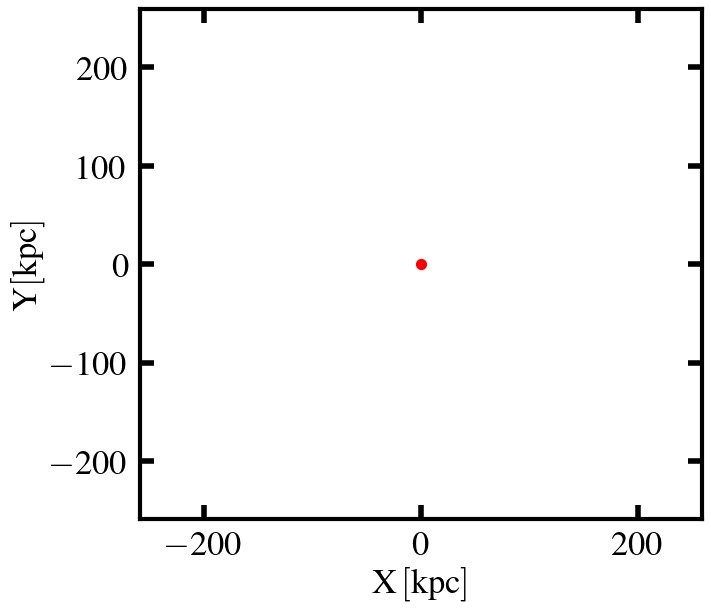

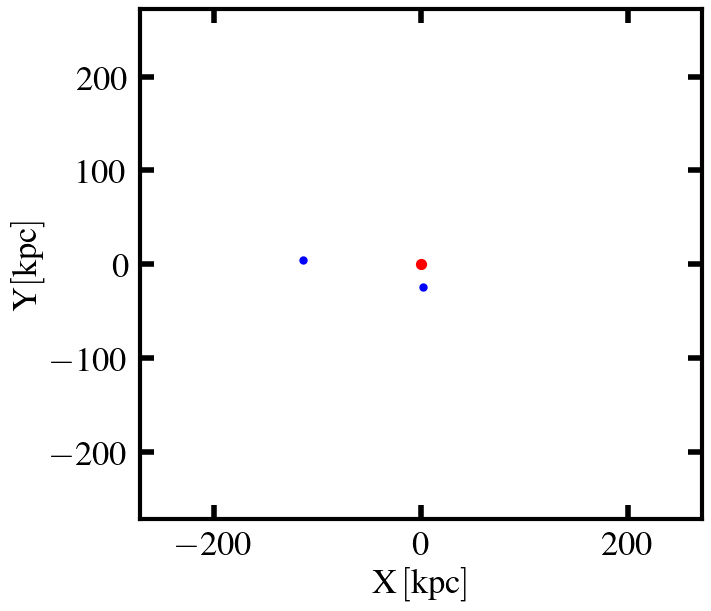

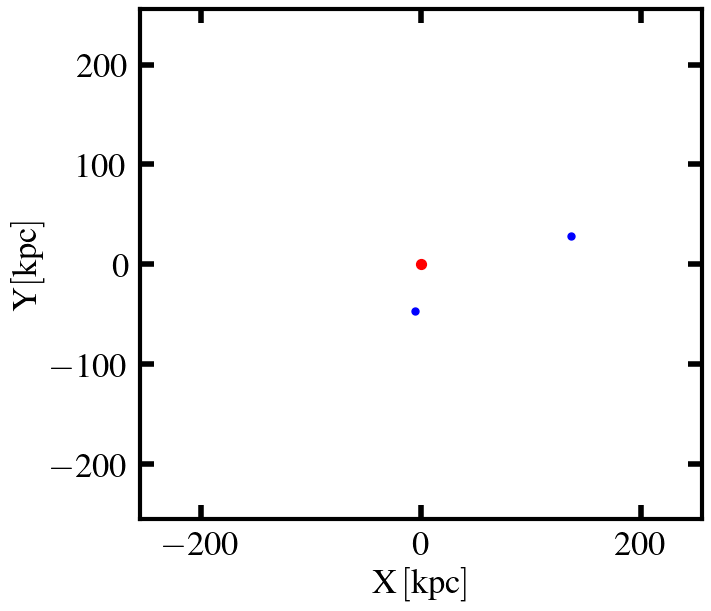

In [9]:
sat_ids = {}
no_sat_inds = np.asarray([])
no_sat_hosts = np.asarray([])
ind = 0
print('------- at z=0.5 -------')
for host in host_galID_ztarget.astype(int):
    #...This grabs positions, groupIDs, and galIDs for satelites bound to host
    sat_mask = np.where(gID_sat==host)
    sat_c = c_sat[sat_mask]
    sat_gID = gID_sat[sat_mask]
    sat_galIDs = galID_sat[sat_mask]
    
    #...Now we print out the galaxy ids of each satelite around a given host
    print('-- host '+str(host)+' --')
    print('SatIDs: '+str(sat_galIDs))
    
    #..we have to remove any hosts that don't have satellites at the target redshift
    if len(sat_galIDs)==0:
        print('This satellite will be removed from the list')
        no_sat_inds = np.append(no_sat_inds,ind)
        no_sat_hosts = np.append(no_sat_hosts,'host_'+str(int(host)))

    print('--------------')
    print('')
    
    #...This grabs host positions and rvir
    host_c = c_cen[np.where(galID_cen==host)]
    host_rvir = Rvir_cen[np.where(galID_cen==host)]
    
    #...This recenters satelite positions on host
    sat_c_centered = sat_c - host_c
    plot_lim = host_rvir

    #...Save sat ids to dictionary
    sat_ids['host_'+str(int(host))]=sat_galIDs
    
    #...Now for fun we plot the satellites (blue) around thier host (red)
    fig, ax = plt.subplots(figsize=(7,6),constrained_layout=True,dpi=100)
    plt.rc('axes', linewidth=3)
    fig.patch.set_facecolor('xkcd:white')

    ax.tick_params(which='major',width=4,length=10,direction='in',top=True,right=True,labelsize=size,pad=8)
    ax.tick_params(which='minor',width=2,length=5,direction='in',top=True,right=True)
    ax.set_xlabel(r'$\rm X \, [kpc]$', fontsize = size)
    ax.set_ylabel(r'$\rm Y [kpc]$', fontsize = size)
    ax.set_xlim([-plot_lim,plot_lim])
    ax.set_ylim([-plot_lim,plot_lim])

    ax.scatter(sat_c_centered[:,0],sat_c_centered[:,1],c='blue',s=25)
    ax.scatter(0,0,c='red',s=50)
    ind=ind+1

#host_galID_z0 = np.delete(host_galID_z0,no_sat_inds.astype(int))
#host_galID_ztarget = np.delete(host_galID_ztarget,no_sat_inds.astype(int))

print('')
#print(host_galID_z0)
print(len(host_galID_ztarget))
print(len(sat_ids.keys()))

## Particle Data analysis
Use the particle data to extract ids of interest at z=0.5 for al satellites.

In [10]:
particle_path = '../data/particle_data/objects_'+str(snap_ztarget)+'/'
fobj_ex = 'particles_within_Rvir_object_1000.hdf5'
with h5py.File(particle_path+fobj_ex,'r') as h5:
    keys = list(h5.keys())
    for i in keys:
        print(i)

Mbaryon
Mdm
Mgas
Mstar
Mvir
Rvir
VXc
VYc
VZc
Xc
Yc
Zc
dm_chid
dm_id
dm_idgen
dm_mass
dm_pot
dm_threshold
dm_vx
dm_vy
dm_vz
dm_x
dm_y
dm_z
fbaryon
fdm
fgas
fstar
galaxyID
gas_chid
gas_hsml
gas_id
gas_idgen
gas_mass
gas_metal
gas_ne
gas_nh
gas_pot
gas_rho
gas_sfr
gas_threshold
gas_u
gas_vx
gas_vy
gas_vz
gas_x
gas_y
gas_z
groupID
n_gas
n_particles
n_star
n_substructures
redshift
snapshot
stellar_chid
stellar_id
stellar_idgen
stellar_mass
stellar_metal
stellar_pot
stellar_tform
stellar_threshold
stellar_vx
stellar_vy
stellar_vz
stellar_x
stellar_y
stellar_z
time


In [11]:
target_ids = {}
print('------- at z=0.5 -------')
for host in sat_ids.keys():
    print('-- '+str(host)+' --')
    baryon_ids_insat = {}
    for sat in sat_ids[host]:
        fobj = 'particles_within_Rvir_object_'+str(sat)+'.hdf5'
        
        with h5py.File(particle_path+fobj,'r') as h5:
            star_ids = h5['stellar_id'][:]
            gas_ids = h5['gas_id'][:]
        
        baryon_ids = np.concatenate((star_ids,gas_ids))
        baryon_ids_insat['sat_'+str(sat)]=baryon_ids
        print('n_baryons in sat_'+str(sat)+': '+str(len(baryon_ids)))
    target_ids[host]=baryon_ids_insat
    print('')

------- at z=0.5 -------
-- host_12 --
n_baryons in sat_143: 496639
n_baryons in sat_198: 340301
n_baryons in sat_1539: 22084
n_baryons in sat_1544: 31588
n_baryons in sat_3260: 5807
n_baryons in sat_5617: 6819

-- host_11 --
n_baryons in sat_600: 71209
n_baryons in sat_1545: 2741
n_baryons in sat_2816: 26734
n_baryons in sat_3005: 6841
n_baryons in sat_4659: 1169
n_baryons in sat_8394: 4233

-- host_13 --
n_baryons in sat_230: 288173
n_baryons in sat_581: 126503
n_baryons in sat_796: 87549
n_baryons in sat_1619: 14256
n_baryons in sat_14026: 5352

-- host_17 --
n_baryons in sat_571: 139504
n_baryons in sat_3152: 23798
n_baryons in sat_10578: 4949

-- host_27 --
n_baryons in sat_123: 613904
n_baryons in sat_164: 521268
n_baryons in sat_408: 181562
n_baryons in sat_1298: 33203
n_baryons in sat_1776: 33349

-- host_26 --
n_baryons in sat_201: 437064

-- host_19 --
n_baryons in sat_770: 96228
n_baryons in sat_1412: 18904
n_baryons in sat_1742: 10126
n_baryons in sat_1781: 18049
n_baryons 

## Look for target ids in hosts at z=0

In [12]:
z0_particle_path = '../data/particle_data/objects_1200/'

print('------- at z=0 -------')
#bad_hosts = np.asarray([])
bad_inds = np.asarray([])
count = 0
for host in host_galID_z0.astype(int):
    print('-- host '+str(host)+' --')
    fobj = 'particles_within_Rvir_object_'+str(int(host))+'.hdf5'

    with h5py.File(z0_particle_path+fobj,'r') as h5:
        star_ids = h5['stellar_id'][:]
    
    total_match = 0
    for sat in target_ids['host_'+str(int(host_galID_ztarget[count]))]:
        targIDs = target_ids['host_'+str(int(host_galID_ztarget[count]))][sat][:]
        matchingIDs = star_ids[np.where(np.isin(star_ids,targIDs))]
        print(str(len(matchingIDs))+' matching ids from '+str(sat)+' at z=0.5')
        total_match = total_match+len(matchingIDs)
    
    if total_match == 0:
        #bad_hosts = np.append(bad_hosts,'host_'+str(int(host_galID_ztarget[count])))
        bad_inds = np.append(bad_inds,count)
    count=count+1
    print('')

print(len(host_galID_z0),len(host_galID_ztarget))
host_galID_z0 = np.delete(host_galID_z0,bad_inds.astype(int))
host_galID_ztarget = np.delete(host_galID_ztarget,bad_inds.astype(int))
print(len(host_galID_z0),len(host_galID_ztarget))

------- at z=0 -------
-- host 11 --
0 matching ids from sat_143 at z=0.5
0 matching ids from sat_198 at z=0.5
0 matching ids from sat_1539 at z=0.5
0 matching ids from sat_1544 at z=0.5
0 matching ids from sat_3260 at z=0.5
0 matching ids from sat_5617 at z=0.5

-- host 11 --
33086 matching ids from sat_600 at z=0.5
3833 matching ids from sat_1545 at z=0.5
20836 matching ids from sat_2816 at z=0.5
6574 matching ids from sat_3005 at z=0.5
674 matching ids from sat_4659 at z=0.5
7150 matching ids from sat_8394 at z=0.5

-- host 12 --
0 matching ids from sat_230 at z=0.5
0 matching ids from sat_581 at z=0.5
0 matching ids from sat_796 at z=0.5
0 matching ids from sat_1619 at z=0.5
0 matching ids from sat_14026 at z=0.5

-- host 12 --
295192 matching ids from sat_143 at z=0.5
234930 matching ids from sat_198 at z=0.5
10560 matching ids from sat_1539 at z=0.5
9821 matching ids from sat_1544 at z=0.5
753 matching ids from sat_3260 at z=0.5
2385 matching ids from sat_5617 at z=0.5

-- host 1

## Let's plot the particle data now

-- host 11 --
-- host 12 --
-- host 13 --
-- host 14 --
-- host 15 --
-- host 16 --
-- host 17 --
-- host 19 --
-- host 20 --
-- host 21 --
-- host 22 --
-- host 24 --
-- host 25 --
-- host 27 --
-- host 28 --
-- host 29 --
-- host 30 --
-- host 32 --
-- host 34 --
-- host 35 --
-- host 36 --
-- host 37 --


/var/folders/1s/q5pj4cgj1tn1rjk58nqzdd2h0000gn/T/ipykernel_8679/548740475.py:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(figsize=(9,6),constrained_layout=True,dpi=100)


-- host 38 --
-- host 39 --
-- host 42 --
-- host 45 --


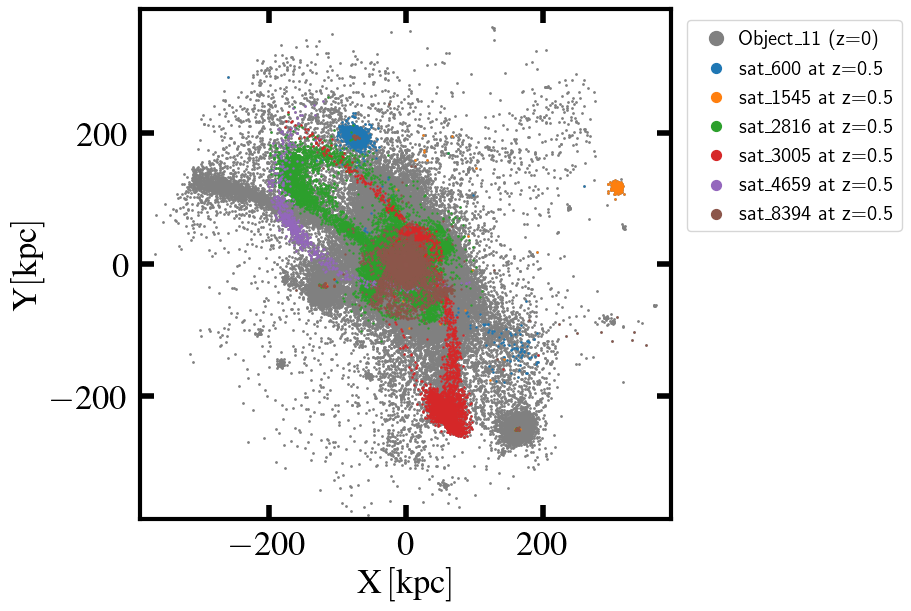

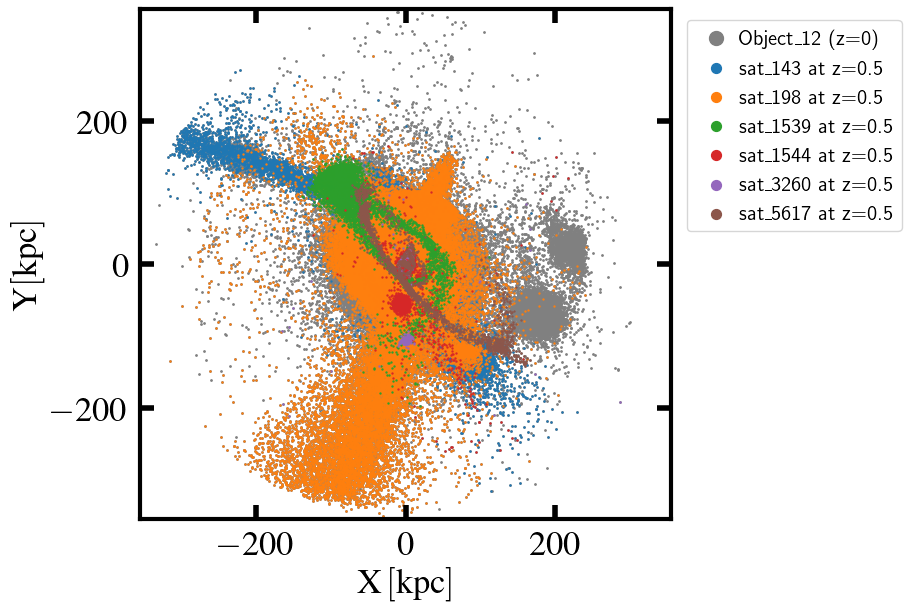

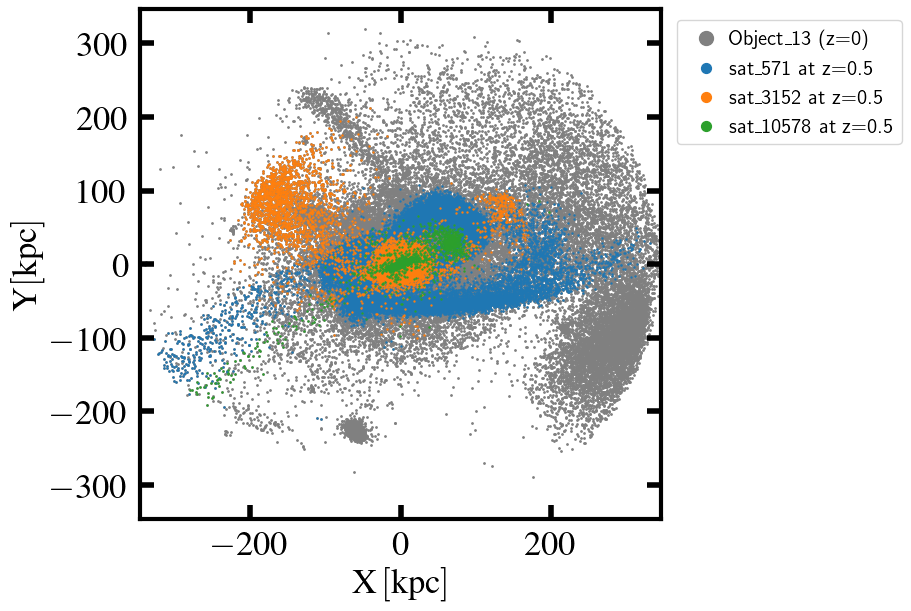

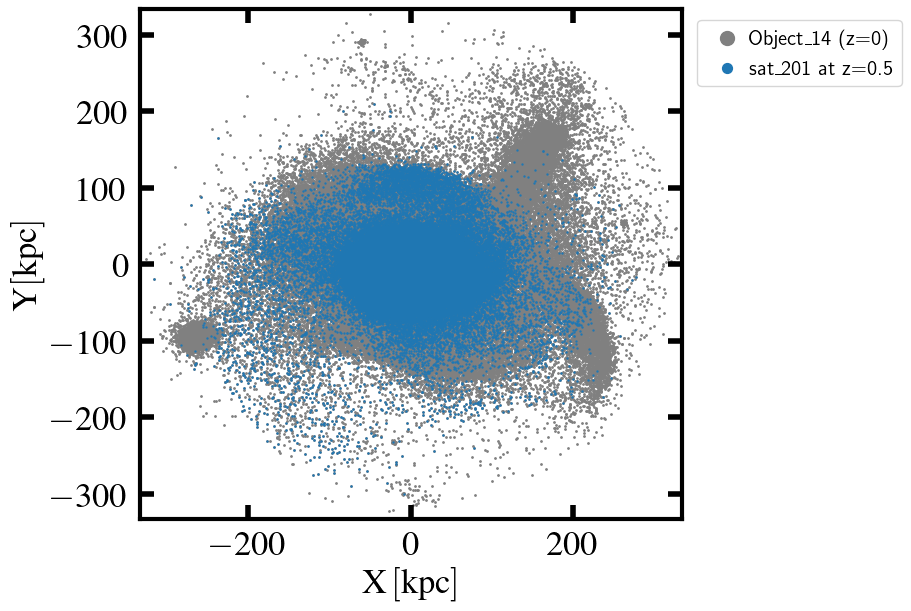

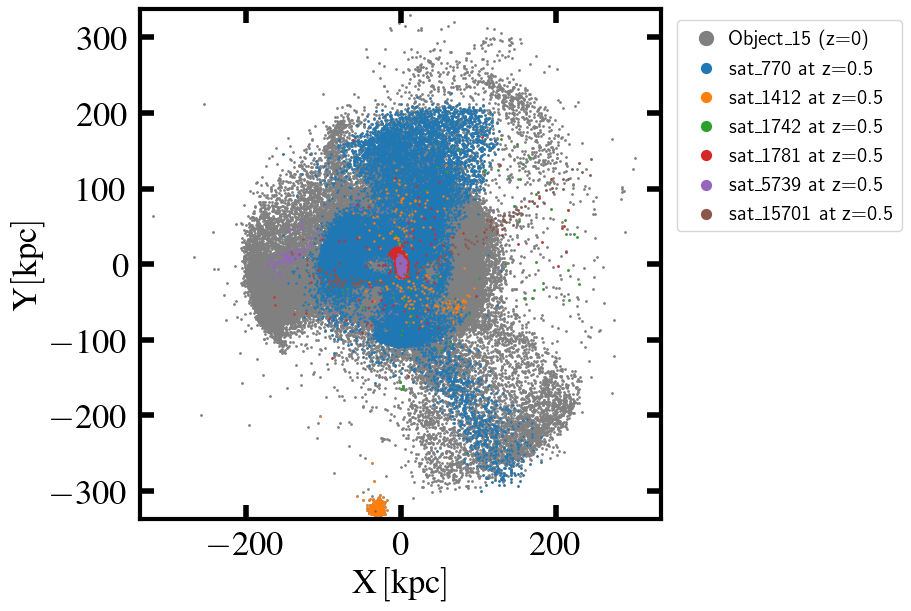

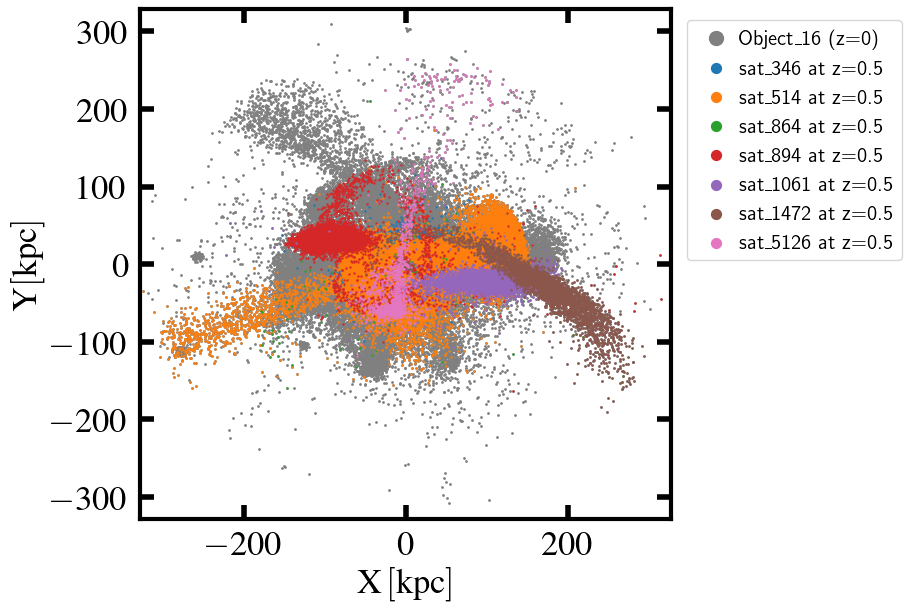

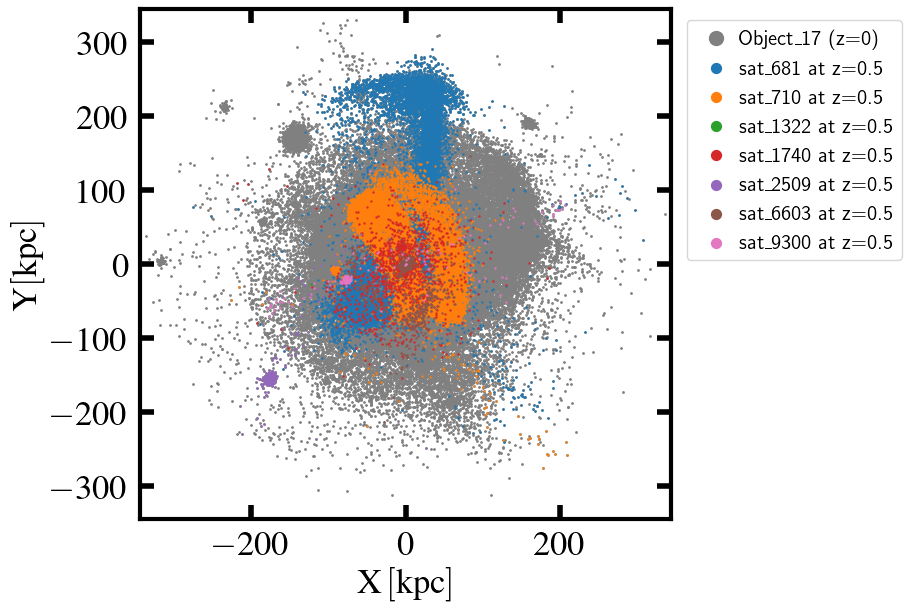

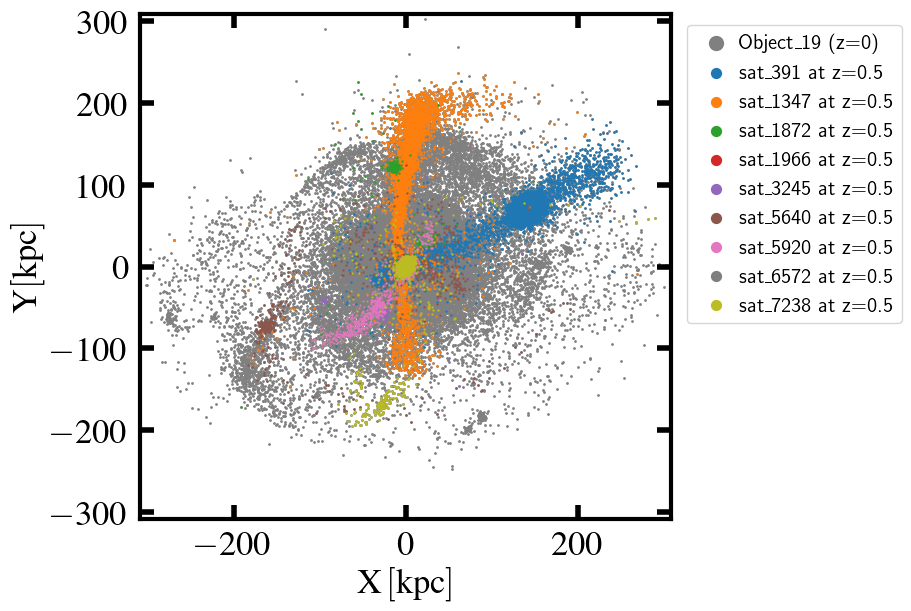

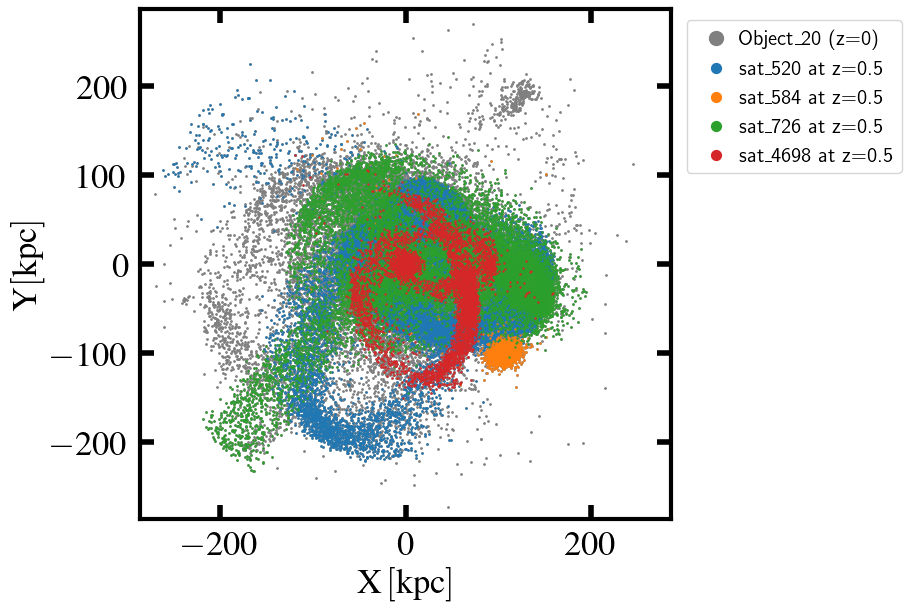

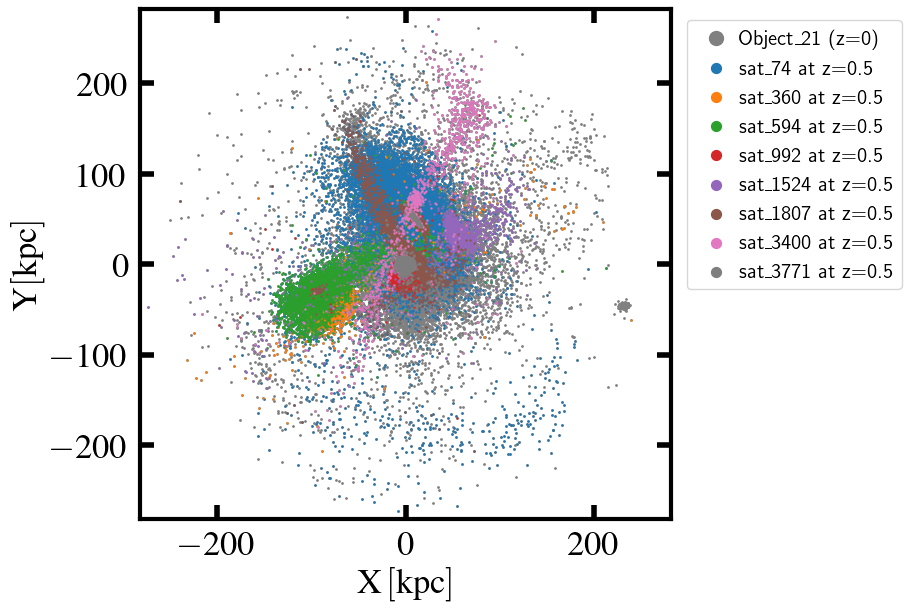

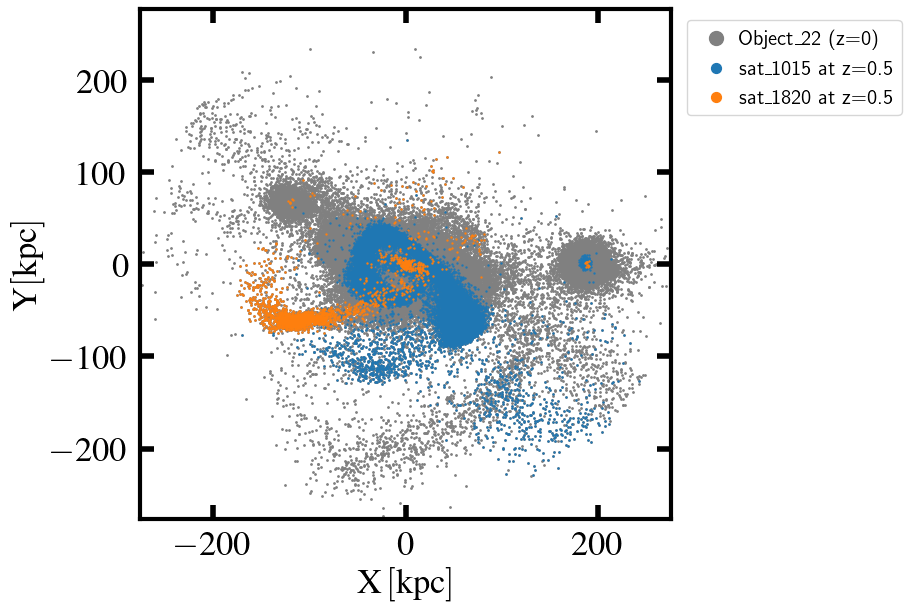

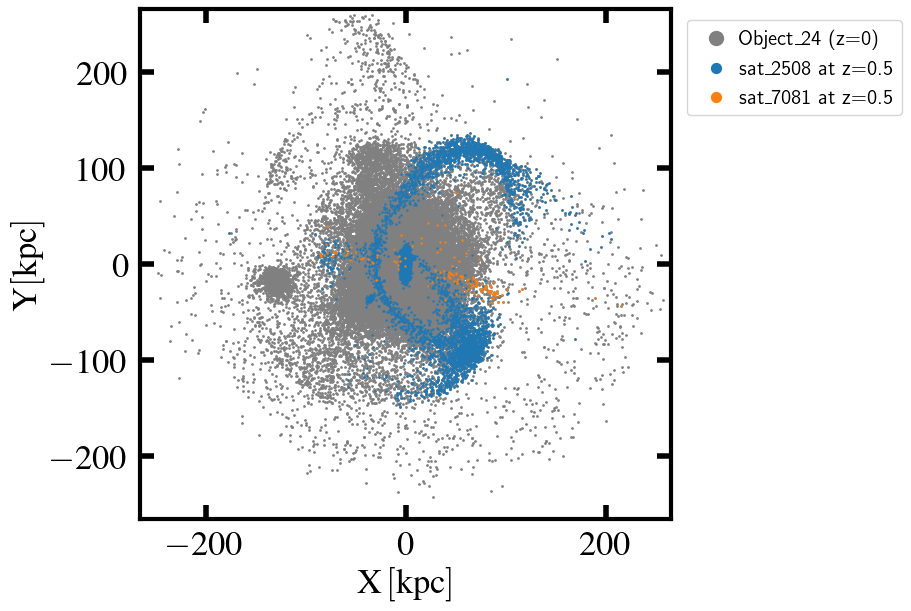

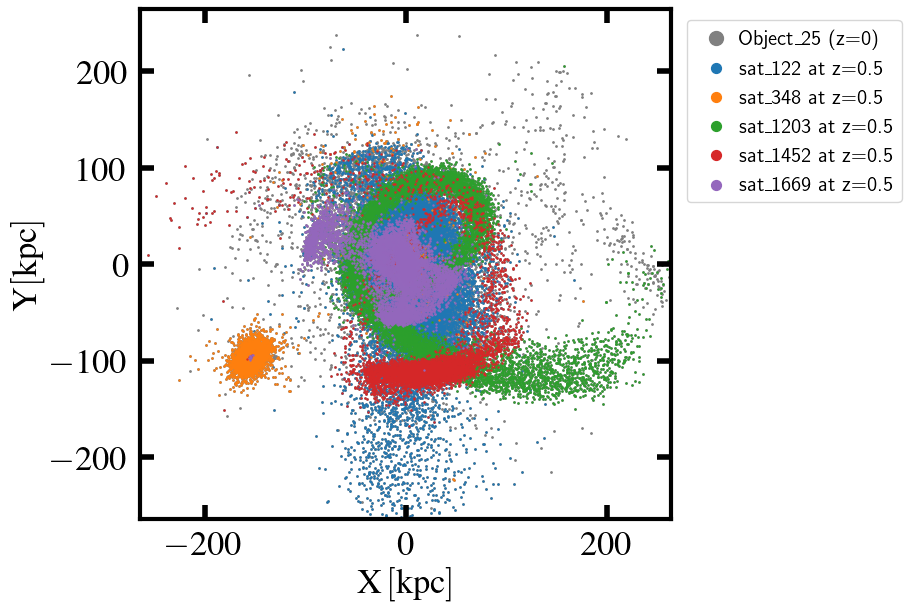

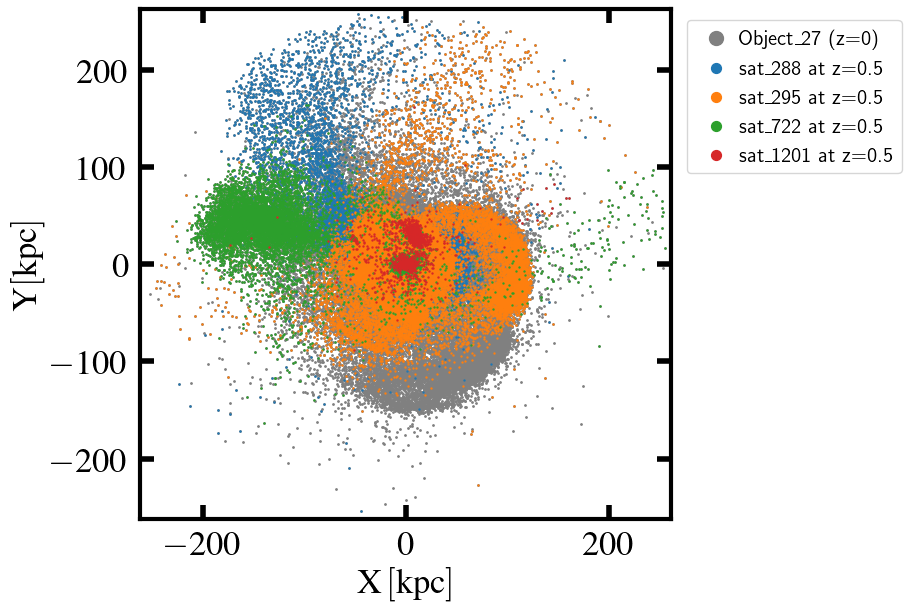

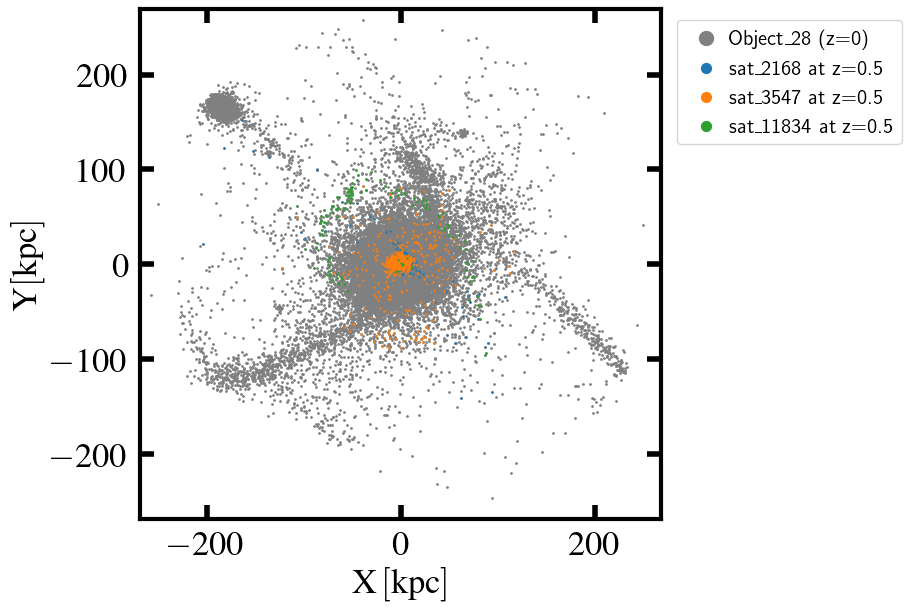

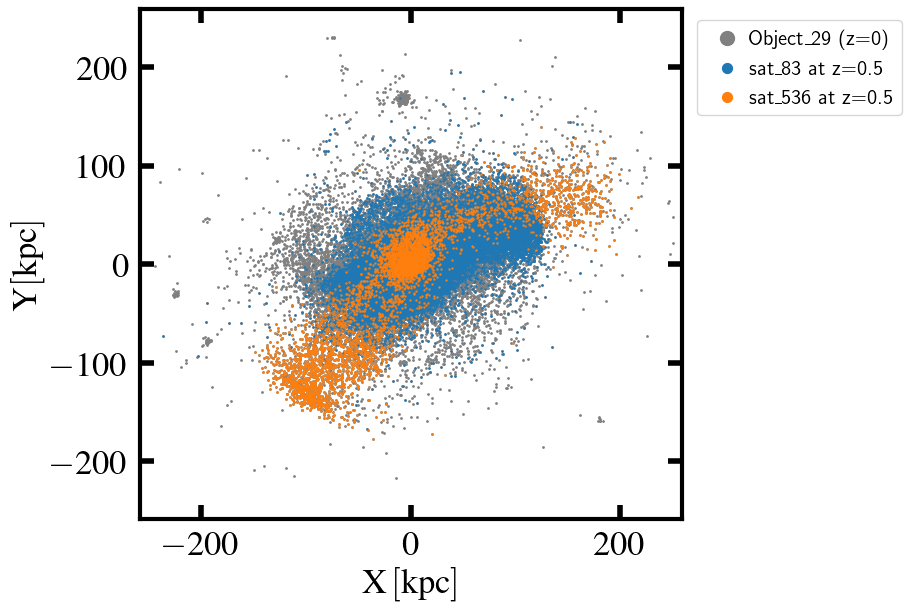

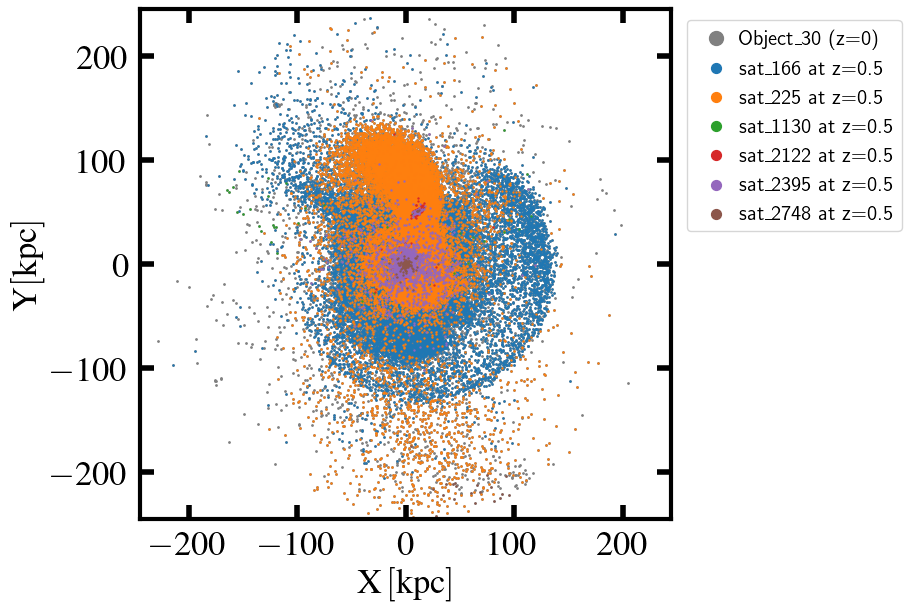

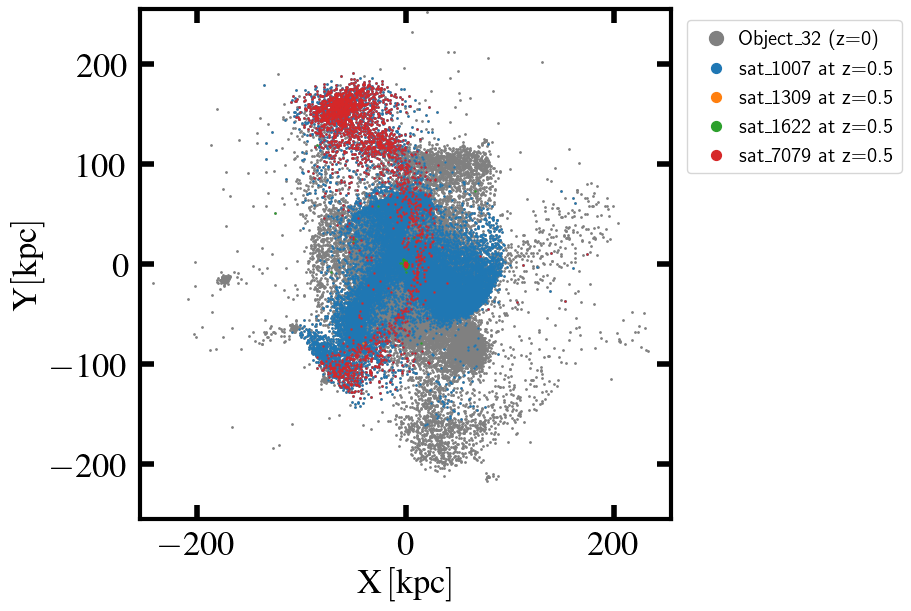

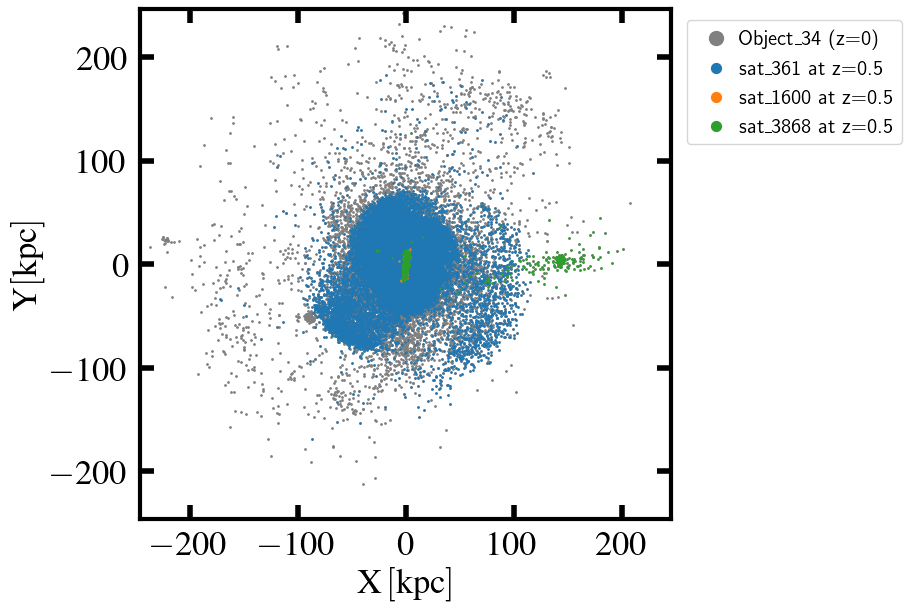

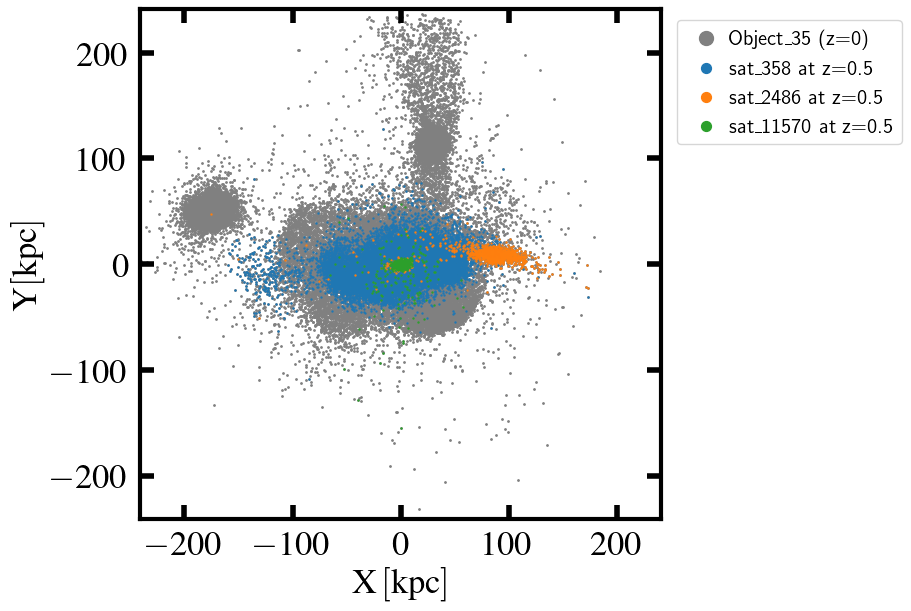

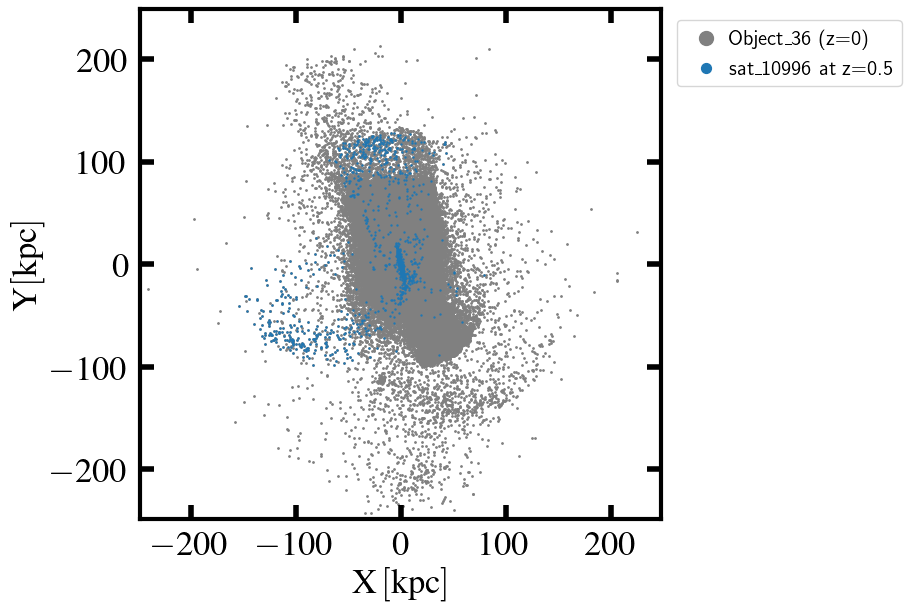

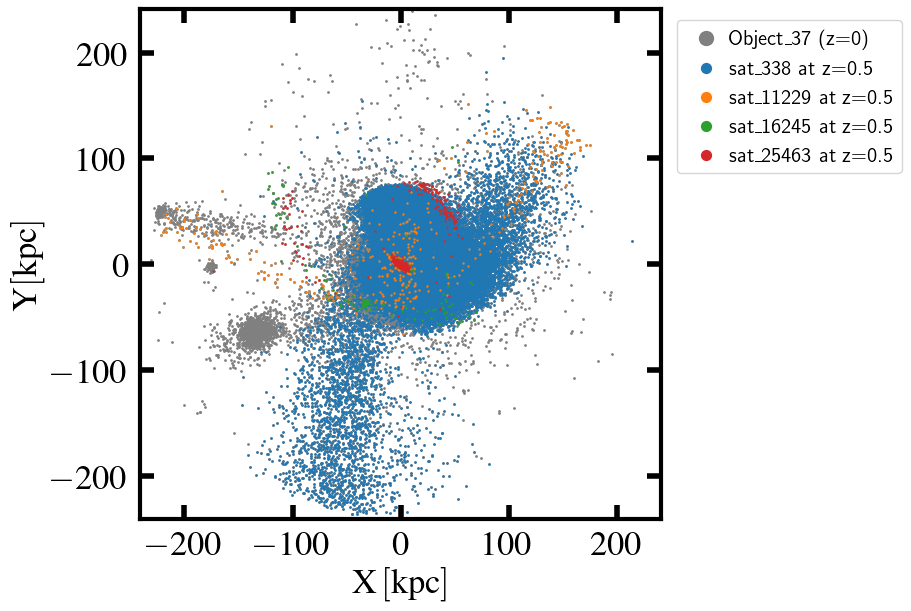

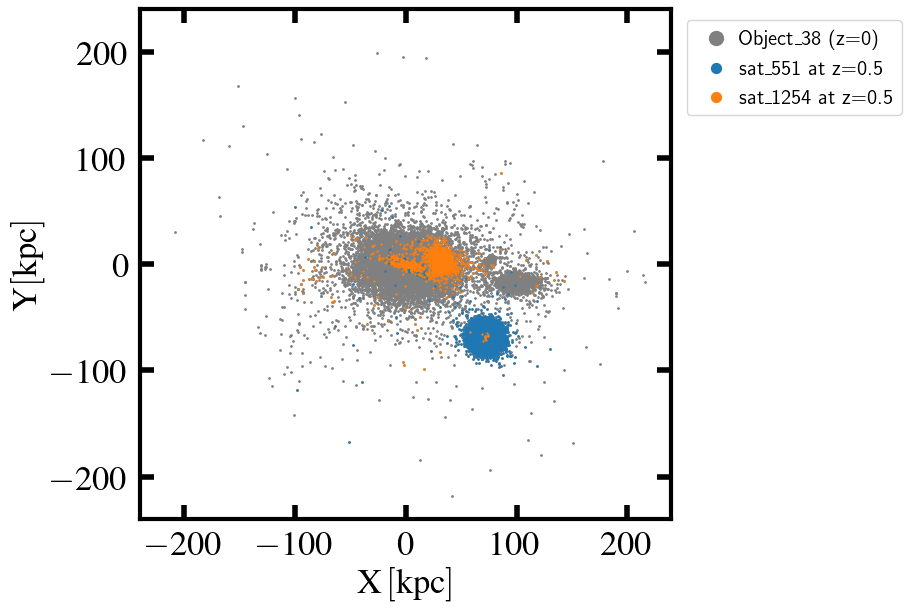

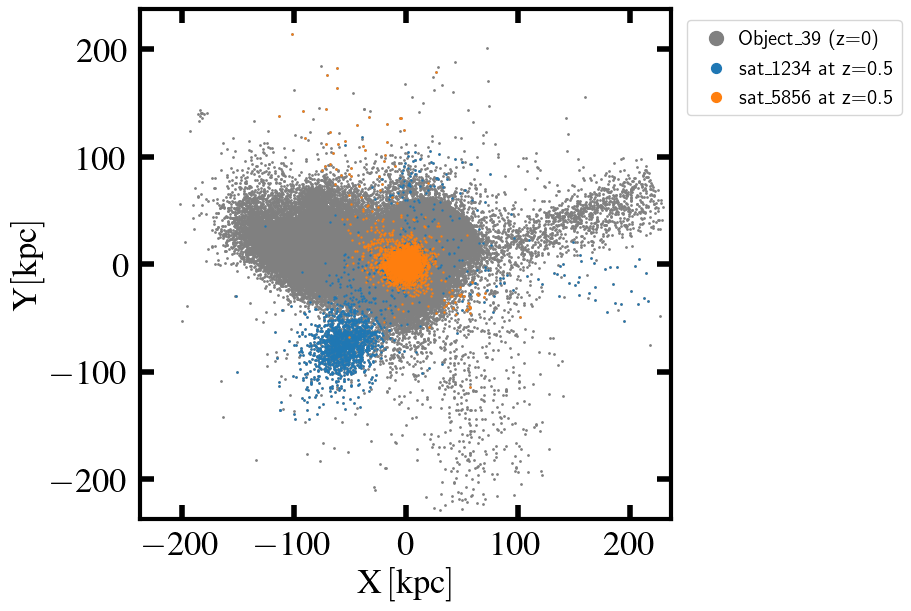

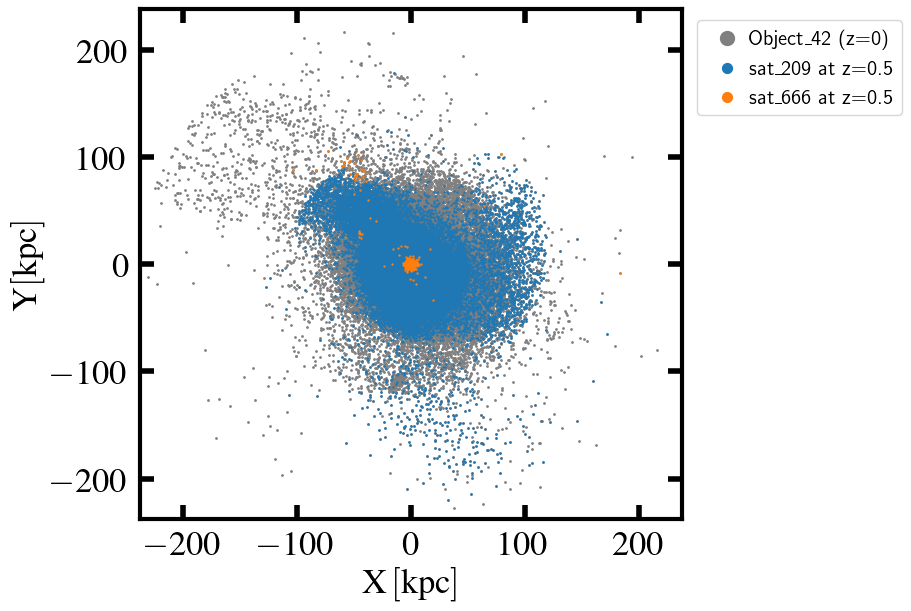

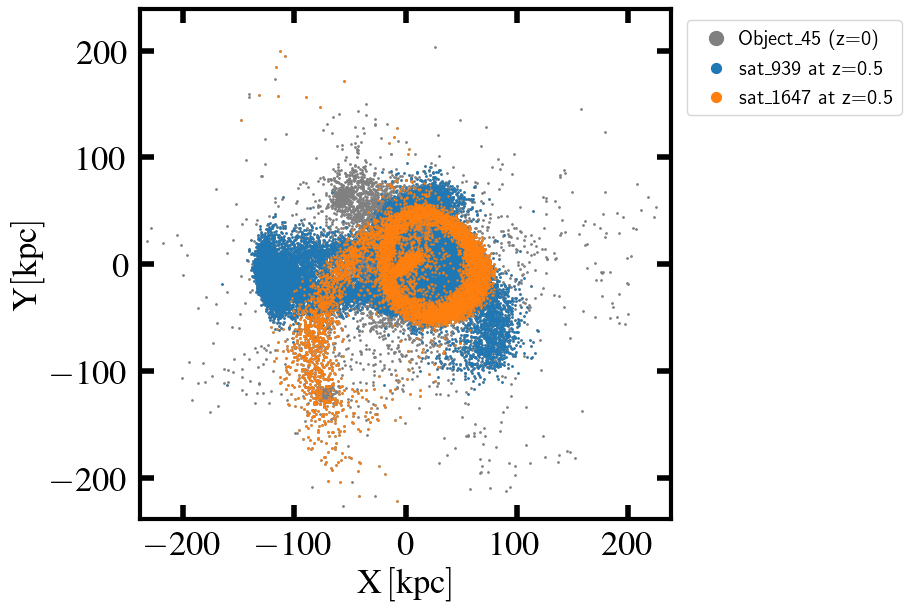

In [24]:
count = 0
for host in host_galID_z0.astype(int):
    print('-- host '+str(host)+' --')
    fobj = 'particles_within_Rvir_object_'+str(int(host))+'.hdf5'

    with h5py.File(z0_particle_path+fobj,'r') as h5:
        rvir = h5['Rvir'][()]/h
        x,y = h5['stellar_x'][:]/h,h5['stellar_y'][:]/h#,h5['stellar_z'][:]
        star_ids = h5['stellar_id'][:]
    #c = np.transpose(np.asarray([x,y,z]))*(1./h)
        
    fig, ax = plt.subplots(figsize=(9,6),constrained_layout=True,dpi=100)
    plt.rc('axes', linewidth=3)
    fig.patch.set_facecolor('xkcd:white')

    plot_lim = rvir
    ax.tick_params(which='major',width=4,length=10,direction='in',top=True,right=True,labelsize=size,pad=8)
    ax.tick_params(which='minor',width=2,length=5,direction='in',top=True,right=True)
    ax.set_xlabel(r'$\rm X \, [kpc]$', fontsize = size)
    ax.set_ylabel(r'$\rm Y [kpc]$', fontsize = size)
    ax.set_xlim([-plot_lim,plot_lim])
    ax.set_ylim([-plot_lim,plot_lim])
    
    ax.scatter(x,y,s=1,c='grey',label='Object_'+str(host)+' (z=0)')
    for sat in target_ids['host_'+str(int(host_galID_ztarget[count]))]:
        targIDs = target_ids['host_'+str(int(host_galID_ztarget[count]))][sat][:]
        match_mask = np.where(np.isin(star_ids,targIDs))
        ax.scatter(x[match_mask],y[match_mask],s=0.5,label=str(sat)+' at z=0.5')
    count = count+1
    ax.legend(bbox_to_anchor=(1.01, 1),loc='upper left',handletextpad=0.1,fontsize=size-10,markerscale=10)
    
    #fig.savefig('../plots/streams_from_sats/Object_'+str(host)+'.pdf')